# Get to Know Astronauts and Manned Space Missions

## Index
<font size='3'>1. [Importing Libraries](#libraries)</font>  
<font size='3'>2. [Loading Data](#loading)</font>  
<font size='3'>3. [Data Preprocessing](#preprocessing)</font>  
&emsp;<font size='3'>3.1 [Dealing with Missing Data](#missing_data)</font>  
&emsp;<font size='3'>3.2 [Creating New Features](#new_features)</font>  
&emsp;<font size='3'>3.3 [Data Cleaning](#cleaning)</font>  
<font size='3'>4. [Data Analysis](#analysis)</font>  
&emsp;<font size='3'>4.1 [Which Features are important to Single Mission Duration?](#duration)</font>  
&emsp;<font size='3'>4.2 [Which Features are important to Astronaut's Age on Mission? ](#age)</font>  
&emsp;<font size='3'>4.3 [What are important to Astronaut Training Time?](#training)</font>  
&emsp;<font size='3'>4.4 [Sex, Occupation and Military/Civilian](#sex)</font>  
&emsp;<font size='3'>4.5 [Nationality](#nationality)</font>  
<font size='3'>5. [Conclusion](#conclusion)</font>

## 1. Importing Libraries <a name='libraries'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import networkx as nx

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import warnings

## 2. Loading Data <a name='loading'></a>

In [2]:
df = pd.read_csv('astronauts.csv')
df.head(10)

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,...,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0
3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,...,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,...,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0
5,6,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-1,...,1962,Vostok 3,Vostok 3,Vostok 3,Vostok 3,94.00,519.33,0,0.0,0.0
6,7,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-2,...,1970,Soyuz 9,Soyuz 9,Soyuz 9,Soyuz 9,424.00,519.33,0,0.0,0.0
7,8,6,4,"Popovich, Pavel",ПОПОВИЧ Павел Романович,male,1930,U.S.S.R/Russia,military,TsPK-1,...,1962,Vostok 4,Vostok 4,Vostok 4,Vostok 4,70.93,448.45,0,0.0,0.0
8,9,6,4,"Popovich, Pavel",ПОПОВИЧ Павел Романович,male,1930,U.S.S.R/Russia,military,TsPK-2,...,1974,Soyuz 14,Soyuz 14,Soyuz 14,Soyuz 14,377.00,448.45,0,0.0,0.0
9,10,7,3,"Schirra, Walter M., Jr.","Schirra, Walter M., Jr.",male,1923,U.S.,military,1959 NASA group 1,...,1962,Mercury-Atlas 8,Mercury-Atlas 8,Mercury-Atlas 8,Mercury-Atlas 8,9.22,295.20,0,0.0,0.0


### Description of the Variables   
>* **id** ID  
>* **number** Number  
>* **nationwide_number** Number within country  
>* **name** Full name  
>* **original_name** Name in original language  
>* **sex** Sex  
>* **year_of_birth** Year of birth  
>* **nationality** Nationality  
>* **military_civilian** Military status  
>* **selection** Name of selection program  
>* **year_of_selection** Year of selection program  
>* **mission_number** Mission number  
>* **total_number_of_missions** Total number of missions  
>* **occupation** Occupation  
>* **year_of_mission** Mission year  
>* **mission_title** Mission title  
>* **ascend_shuttle** Name of ascent shuttle  
>* **in_orbit** Name of spacecraft used in orbit  
>* **descend_shuttle** Name of descent shuttle  
>* **hours_mission** Duration of mission in hours  
>* **total_hrs_sum** Total duration of all missions in hours  
>* **field21** Instances of EVA by mission  
>* **eva_hrs_mission** Duration of extravehicular activities during the mission    
>* **total_eva_hrs** Total duration of all extravehicular activities in hours

## 3. Data Preprocessing<a name='preprocessing'></a>

### 3.1 Dealing with Missing Data<a name='missing_data'></a>

Now let's see the information of the varibles:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1277 non-null   int64  
 1   number                    1277 non-null   int64  
 2   nationwide_number         1277 non-null   int64  
 3   name                      1277 non-null   object 
 4   original_name             1272 non-null   object 
 5   sex                       1277 non-null   object 
 6   year_of_birth             1277 non-null   int64  
 7   nationality               1277 non-null   object 
 8   military_civilian         1277 non-null   object 
 9   selection                 1272 non-null   object 
 10  year_of_selection         1277 non-null   int64  
 11  mission_number            1277 non-null   int64  
 12  total_number_of_missions  1277 non-null   int64  
 13  occupation                1277 non-null   object 
 14  year_of_

We see that there are some varibles, which have missing information, such as:  
>* **original_name** (5 missing values)  
>* **selection** (5 missing values)  
>* **mission_title** (1 missing value)  
>* **ascend_shuttle** (1 missing value)  
>* **descend_shuttle** (1 missing value)   

So let's take a closer look at each varible:

* **original_name**

In [4]:
df.loc[df['original_name'].isnull()]

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
185,186,87,1,Vladimir Remek,NaN,male,1948,Czechoslovakia,military,Air Gorce Group 6 - USSR,...,1978,Soyuz 28,Soyuz 28,Soyuz 28,Soyuz 28,190.28,190.28,0,0.0,0.0
368,369,173,1,"Al-saud, Sultan bin Salman",NaN,male,1956,Saudi Arabia,civilian,Saudi-Arabia,...,1985,STS-51G,STS-51G,STS-51G,STS-51G,170.00,170.00,0,0.0,0.0
415,416,195,1,"Neri Vela, Rodolfl",NaN,male,1952,Mexico,civilian,1985 NASA Group,...,1985,STS-61-B,STS-61-B,STS-61-B,STS-61-B,165.07,165.67,0,0.0,0.0
437,438,205,1,"Faris, M. Achmed",NaN,male,1951,Syria,military,Syria,...,1987,1,Soyuz TM-3,Mir EP,Soyuz TM-2,191.00,191.00,0,0.0,0.0
449,450,211,1,"Mohmand, Abdul Ahad",NaN,male,1959,Afghanistan,military,Afghanistan,...,1988,3,Soyuz TM-6,Mir EP,Soyuz TM-5,212.00,212.00,0,0.0,0.0


Considering that the varible original_name is not much relevant, we fill the missing values with empty string.

In [5]:
df['original_name'].loc[df['original_name'].isnull()] = ''

C:\Program Files\Anaconda1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
df.loc[df['original_name'].isnull()]

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs


Let's see next varible with missing values:  
* **selection**

In [7]:
df.loc[df['selection'].isnull()]

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
1066,1067,440,277,"Olsen, Gregory Hammond","Olsen, Gregory Hammond",male,1945,U.S.,civilian,NaN,...,2005,Soyuz TMA-7,Soyuz TMA-7,Soyuz TMA-7,Soyuz TMA-7,237.290,237.290,0,0.0,0.0
1083,1084,449,283,"Ansari, Anousheh",انوشه انصاری,female,1966,U.S.,civilian,NaN,...,2006,Soyuz TMA-9,Soyuz TMA-9,Soyuz TMA-9,Soyuz TMA-8,261.525,261.525,0,0.0,0.0
1095,1096,456,288,"Simonyi, Charles (Karoly)","Simonyi, Charles (Karoly)",male,1948,U.S.,civilian,NaN,...,2007,Soyuz TMA-10,Soyuz TMA-10,Soyuz TMA-10,Soyuz TMA-10,331.400,638.770,0,0.0,0.0
1096,1097,456,288,"Simonyi, Charles (Karoly)","Simonyi, Charles (Karoly)",male,1948,U.S.,civilian,NaN,...,2009,Soyuz TMA-14,Soyuz TMA-14,Soyuz TMA-14,Soyuz TMA-14,307.850,638.770,0,0.0,0.0
1155,1156,486,309,"Garriott, Richard Allen","Garriott, Richard Allen",male,1961,U.K./U.S.,civilian,NaN,...,2008,Soyuz TMA-13,Soyuz TMA-13,Soyuz TMA-13,Soyuz TMA-12,284.890,284.890,0,0.0,0.0


We fill the missing values with 'Unknown':

In [8]:
df['selection'].loc[df['selection'].isnull()] = 'Unknown'

C:\Program Files\Anaconda1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
df.loc[df['selection'].isnull()]

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs


Let's see next three varibles with missing values:  
* **missin_title**  
* **ascend_shuttle**  
* **descend_shuttle**

In [10]:
df.loc[df['mission_title'].isnull()]

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
1237,1238,532,6,"Parmitano, Luca","Parmitano, Luca",male,1976,Italy,military,2009 ESA Group,...,2019,NaN,Soyuz MS-13,ISS,not completed yet,4303.03,8293.31,3,19.23,26.88


In [11]:
df.loc[df['ascend_shuttle'].isnull()]

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
197,198,94,1,Bertalan Farkas,Farkas Bertalan,male,1949,Hungry,civilian,1978 Intercosmos Group,...,1980,Soyuz 36/35,NaN,Soyuz 36/35,NaN,188.75,188.75,0,0.0,0.0


In [12]:
df.loc[df['descend_shuttle'].isnull()]

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
197,198,94,1,Bertalan Farkas,Farkas Bertalan,male,1949,Hungry,civilian,1978 Intercosmos Group,...,1980,Soyuz 36/35,NaN,Soyuz 36/35,NaN,188.75,188.75,0,0.0,0.0


We fill all missing values with 'Unknown':

In [13]:
df['mission_title'].loc[df['mission_title'].isnull()] = 'Unknown'
df['ascend_shuttle'].loc[df['ascend_shuttle'].isnull()] = 'Unknown'
df['descend_shuttle'].loc[df['descend_shuttle'].isnull()] = 'Unknown'

C:\Program Files\Anaconda1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Now let's check the information of the varibles again:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1277 non-null   int64  
 1   number                    1277 non-null   int64  
 2   nationwide_number         1277 non-null   int64  
 3   name                      1277 non-null   object 
 4   original_name             1277 non-null   object 
 5   sex                       1277 non-null   object 
 6   year_of_birth             1277 non-null   int64  
 7   nationality               1277 non-null   object 
 8   military_civilian         1277 non-null   object 
 9   selection                 1277 non-null   object 
 10  year_of_selection         1277 non-null   int64  
 11  mission_number            1277 non-null   int64  
 12  total_number_of_missions  1277 non-null   int64  
 13  occupation                1277 non-null   object 
 14  year_of_

Now we have no null data.

### 3.2 Creating new Features <a name='new_features'></a> 
For better and intuitiver analysis, we should create a couple of new features, which are hidden in the original varibles.

* **age_of_selection** : from this new feature we know the age of an astronaut, when he/she was selected as an astronaut.

In [16]:
df['age_of_selection'] = df['year_of_selection'] - df['year_of_birth']
df.head()

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_selection
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,...,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0,26
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,...,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0,25
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,...,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0,38
3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,...,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0,38
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,...,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0,34


On the same principle, we can create a new feature:  
* **age_of_mission** : from this feature we know the age of an astronaut, when he/she excuted the mission.

In [17]:
df['age_of_mission'] = df['year_of_mission'] - df['year_of_birth']
df.head()

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_selection,age_of_mission
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,...,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0,26,27
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,...,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0,25,26
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,...,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0,38,41
3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,...,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0,38,77
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,...,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0,34,37


### 3.3 Data Cleaning <a name='cleaning'></a>
First, let's check some non-numeric data:

In [18]:
df['sex'].value_counts()

male      1134
female     143
Name: sex, dtype: int64

In [19]:
df['nationality'].value_counts()

U.S.                        854
U.S.S.R/Russia              273
Japan                        20
Canada                       18
France                       18
Germany                      16
China                        14
Italy                        13
U.K./U.S.                     6
Australia                     4
Switzerland                   4
Netherland                    3
Belgium                       3
Spain                         2
Sweden                        2
Bulgaria                      2
U.K.                          2
Republic of South Africa      1
Malysia                       1
Kazakhstan                    1
Korea                         1
Saudi Arabia                  1
Afghanistan                   1
U.S.S.R/Ukraine               1
Mexico                        1
Austria                       1
Denmark                       1
Poland                        1
Slovakia                      1
UAE                           1
Romania                       1
Mongolia

In [20]:
df['military_civilian'].value_counts()

military    769
civilian    508
Name: military_civilian, dtype: int64

In [21]:
df['occupation'].value_counts()

MSP                        498
commander                  315
pilot                      196
flight engineer            192
PSP                         59
Other (space tourist)        5
Flight engineer              4
Other (Space tourist)        3
Space tourist                2
spaceflight participant      1
Pilot                        1
Other (Journalist)           1
Name: occupation, dtype: int64

We notice that some classes of the this feature are twice displayed, so we'll clean it up:

In [22]:
df['occupation'].loc[df['occupation'] == 'Pilot'] = 'pilot'
df['occupation'].loc[df['occupation'] == 'Flight engineer'] = 'flight engineer'
df['occupation'].loc[df['occupation'] == 'spaceflight participant'] = 'Other (space tourist)'
df['occupation'].loc[df['occupation'] == 'Other (Space tourist)'] = 'Other (space tourist)'
df['occupation'].loc[df['occupation'] == 'Space tourist'] = 'Other (space tourist)'
df['occupation'].loc[df['occupation'] == 'Other (Journalist)'] = 'Other (space tourist)'
df['occupation'].loc[df['occupation'] == 'Other (space tourist)'] = 'Other (space tourist/journalist/participant)'

C:\Program Files\Anaconda1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [23]:
df['occupation'].value_counts()

MSP                                             498
commander                                       315
pilot                                           197
flight engineer                                 196
PSP                                              59
Other (space tourist/journalist/participant)     12
Name: occupation, dtype: int64

Now that's clearer!

## 4. Data Analysis<a name='analysis'></a>

### 4.1 Which Features are important to Single Mission Duration?  <a name='duration'></a>
To clarify this question, let's first check the feature importance for the target variable 'hours_mission'.  
We'll use LinearRegression and RandomForest methods, and see which method gives us a better R2 score.

In [25]:
# find the non-numeric features
non_numeric = (df.dtypes == 'object')
object_cols = list(non_numeric[non_numeric].index)
print(object_cols)

['name', 'original_name', 'sex', 'nationality', 'military_civilian', 'selection', 'occupation', 'mission_title', 'ascend_shuttle', 'in_orbit', 'descend_shuttle']


In [26]:
# make a copy to avoid changing original data
label_df = df.copy()

# Apply label encoder to each non-numeric feature
label_encoder = LabelEncoder()
for col in object_cols:
    label_df[col] = label_encoder.fit_transform(label_df[col])

label_df.head()

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_selection,age_of_mission
0,1,1,1,168,457,1,1934,36,1,205,...,426,280,422,1.77,1.77,0,0.0,0.0,26,27
1,2,2,2,497,512,1,1935,36,1,205,...,427,280,421,25.00,25.30,0,0.0,0.0,25,26
2,3,3,1,184,148,1,1921,35,1,109,...,25,25,26,5.00,218.00,0,0.0,0.0,38,41
3,4,3,1,184,148,1,1921,35,1,120,...,182,181,180,213.00,218.00,0,0.0,0.0,38,77
4,5,4,2,81,59,1,1925,35,1,128,...,26,26,27,5.00,5.00,0,0.0,0.0,34,37


In [27]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1277 non-null   int64  
 1   number                    1277 non-null   int64  
 2   nationwide_number         1277 non-null   int64  
 3   name                      1277 non-null   int32  
 4   original_name             1277 non-null   int32  
 5   sex                       1277 non-null   int32  
 6   year_of_birth             1277 non-null   int64  
 7   nationality               1277 non-null   int32  
 8   military_civilian         1277 non-null   int32  
 9   selection                 1277 non-null   int32  
 10  year_of_selection         1277 non-null   int64  
 11  mission_number            1277 non-null   int64  
 12  total_number_of_missions  1277 non-null   int64  
 13  occupation                1277 non-null   int32  
 14  year_of_

In [28]:
# make feature set and target set
X_set = label_df.drop(['hours_mission'], axis=1)
y = label_df['hours_mission']

In [29]:
# split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_set, y,test_size=0.25, random_state=42)

In [30]:
print(f'Length of training set: {len(X_train)}')
print(f'Length of test set: {len(X_test)}')

Length of training set: 957
Length of test set: 320


Use a linear regression model:

In [31]:
# first standardize the features, and then make a regression
model_lr = Pipeline([('scalar', StandardScaler()), ('lr_regression', LinearRegression())])
model_lr.fit(X_train, y_train)

print(f'training R2 score: {model_lr.score(X_train, y_train)}')
print(f'test R2 score: {model_lr.score(X_test, y_test)}')

training R2 score: 0.7605778722865817
test R2 score: 0.7179469690518812


Traing score is not much higher than test score, there seems no overfitting problem. 

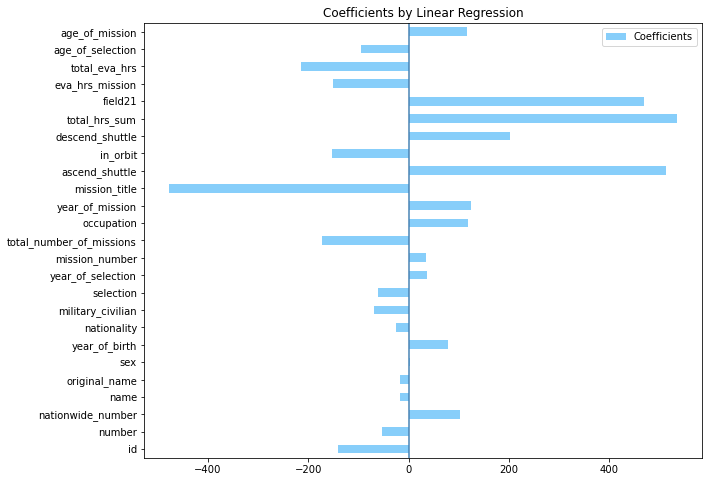

In [33]:
coefs = pd.DataFrame(model_lr[1].coef_, columns=['Coefficients'], index=X_train.columns)
coefs.plot(kind='barh', figsize=(10, 8), color='lightskyblue')
plt.title('Coefficients by Linear Regression')
plt.axvline(x=0, color='steelblue')

Now with Random Forest method:

In [35]:
model_rf = Pipeline([('scalar', StandardScaler()), ('rf_regression', RandomForestRegressor())])
model_rf.fit(X_train, y_train)

print(f'training R2 score: {model_rf.score(X_train, y_train)}')
print(f'test R2 score: {model_rf.score(X_test, y_test)}')

training R2 score: 0.9757065140781003
test R2 score: 0.7608223467222436


The R2 scores of training and test sets are much higher than the scores by the linear regression model, that means the RandomForest model fits the data set better than the linear regression model.  
**Note**: The training data seems to be a little overfitted, but the test score is not bad.

[Text(0, 0, 'sex'),
 Text(0, 1, 'nationality'),
 Text(0, 2, 'occupation'),
 Text(0, 3, 'military_civilian'),
 Text(0, 4, 'mission_number'),
 Text(0, 5, 'age_of_selection'),
 Text(0, 6, 'nationwide_number'),
 Text(0, 7, 'year_of_birth'),
 Text(0, 8, 'name'),
 Text(0, 9, 'number'),
 Text(0, 10, 'age_of_mission'),
 Text(0, 11, 'original_name'),
 Text(0, 12, 'total_eva_hrs'),
 Text(0, 13, 'total_number_of_missions'),
 Text(0, 14, 'selection'),
 Text(0, 15, 'field21'),
 Text(0, 16, 'id'),
 Text(0, 17, 'descend_shuttle'),
 Text(0, 18, 'year_of_selection'),
 Text(0, 19, 'eva_hrs_mission'),
 Text(0, 20, 'year_of_mission'),
 Text(0, 21, 'ascend_shuttle'),
 Text(0, 22, 'in_orbit'),
 Text(0, 23, 'total_hrs_sum'),
 Text(0, 24, 'mission_title')]

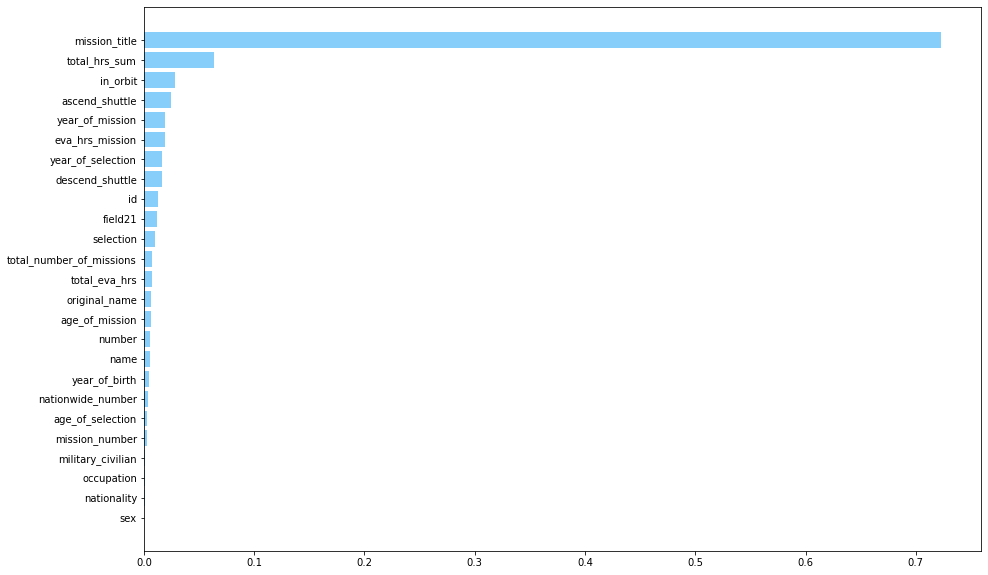

In [36]:
importances = model_rf[1].feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(15,10))
ax.barh(range(len(importances)), importances[indices], color='lightskyblue')
ax.set_yticks(range(len(importances)))
ax.set_yticklabels(np.array(X_train.columns)[indices])

So let's take a closer look at the top features with high feature importance:  
* mission_title

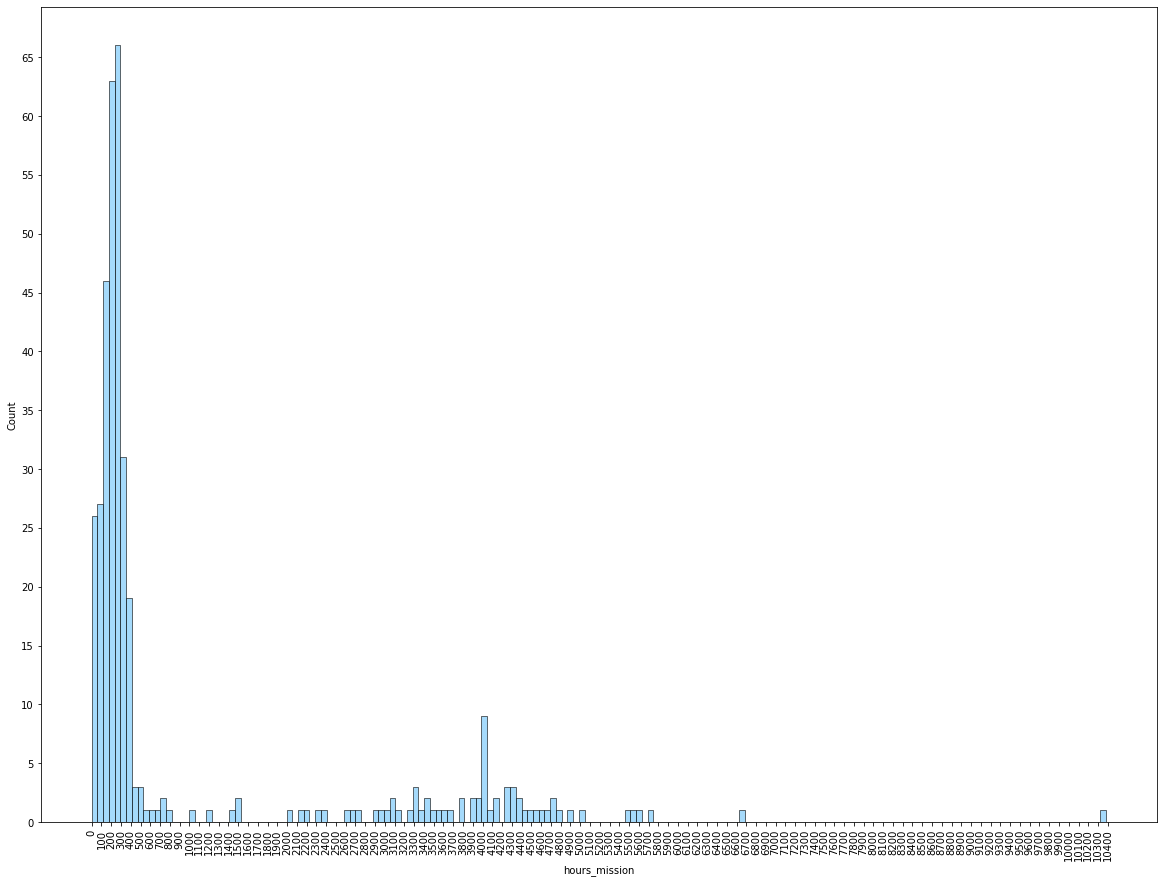

In [38]:
# group the data by mission title to see the average single duration of each mission
mission_and_single_duration = df[['mission_title', 'hours_mission']].groupby(by='mission_title').mean()

fig, ax1 = plt.subplots(figsize=(20,15))
plt.xticks(rotation=90)
plt.xticks(np.arange(0,10500,100))
plt.yticks(np.arange(0,70, 5))
singleMissionDurationy = sns.histplot(data=mission_and_single_duration, x='hours_mission',ax=ax1, fill=True, color='lightskyblue')

From the plot above, we know that averagely most of the missions take around 300 to 400 hours and there are a few missions take more than 3 months for a single duration. So let's check which missions take more than 3 months for a single duration averagely.

In [39]:
more_than_3_month_mission = mission_and_single_duration.loc[mission_and_single_duration['hours_mission'] > 24*30*3]
more_than_3_month_mission['mission_title'] = more_than_3_month_mission.index
more_than_3_month_mission = more_than_3_month_mission.sort_values(by=['hours_mission'], ascending=False)
more_than_3_month_mission

<ipython-input-39-655c7283c30f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_3_month_mission['mission_title'] = more_than_3_month_mission.index


,hours_mission,mission_title
mission_title,,
49,10383.250000,49
43,6666.000000,43
59,5700.016667,59
15,5591.400000,15
48,5522.233333,48
...,...,...
61,2697.530000,61
46,2619.666667,46
1,2347.000000,1


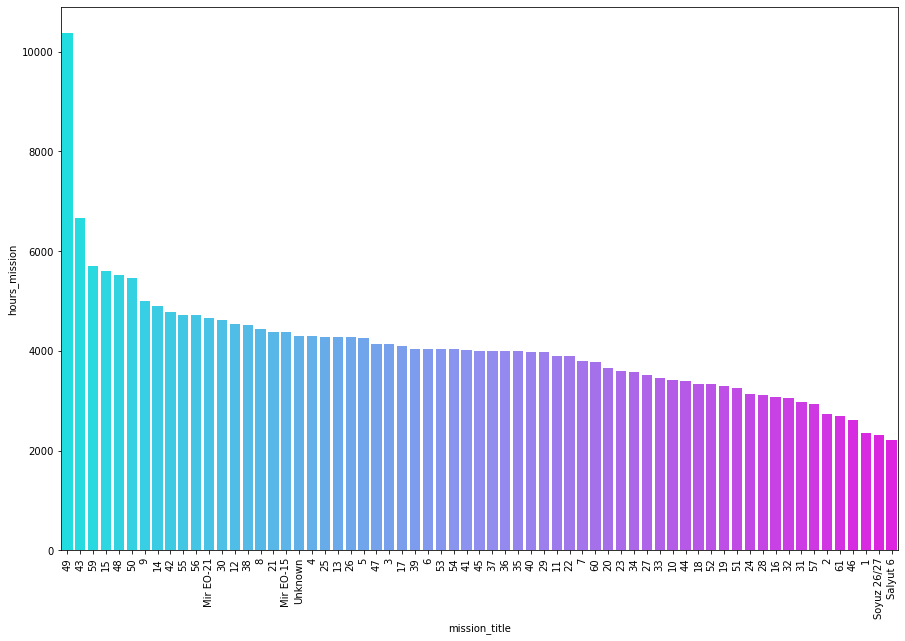

In [40]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
pl = sns.barplot(data=more_than_3_month_mission,x='mission_title', y='hours_mission', palette= 'cool')
plt.show()

The mission named '49' (Expedition 49) has the longest average single duration, more than 10000 hours, let's see the mission details.

In [41]:
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['mission_title'] == '49']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
1162,"Kimbrough, Robert S.","Kimbrough, Robert S.",male,1967,U.S.,military,NASA- 19,2,flight engineer,2016,49,Soyuz MS-02,ISS,Soyuz MS-02,10383.25,10763.25,4,26.0,26.0,49
1221,"Borisenko, Andrei",Андрей Иванович Борисенко,male,1964,U.S.S.R/Russia,military,RKKE-15,2,flight engineer,2016,49,Soyuz MS-02,ISS,Soyuz MS-02,10383.25,14324.25,0,0.0,0.0,52
1261,"Ryzhikov, Sergey",Сергей Николаевич Рыжиков,male,1974,U.S.S.R/Russia,military,TsPK-14,1,commander,2016,49,Soyuz MS-02,ISS,Soyuz MS-02,10383.25,10383.25,0,0.0,0.0,42


Then let's take a look at the missions with average shortest single duration:

In [42]:
less_than_50_hour_mission = mission_and_single_duration.loc[mission_and_single_duration['hours_mission'] < 50]
less_than_50_hour_mission['mission_title'] = less_than_50_hour_mission.index
less_than_50_hour_mission = less_than_50_hour_mission.sort_values(by=['hours_mission'], ascending=True)
less_than_50_hour_mission

<ipython-input-42-3290bcf773ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_than_50_hour_mission['mission_title'] = less_than_50_hour_mission.index


,hours_mission,mission_title
mission_title,,
STS 51-L,0.000,STS 51-L
STS-51-L,0.000,STS-51-L
STS-51L,0.610,STS-51L
Vostok 1,1.770,Vostok 1
Gemini 3,4.860,Gemini 3
MA-6,5.000,MA-6
Mercury-Atlas 7,5.000,Mercury-Atlas 7
Mercury-Atlas 8,9.220,Mercury-Atlas 8
Shenzhou 5,21.000,Shenzhou 5


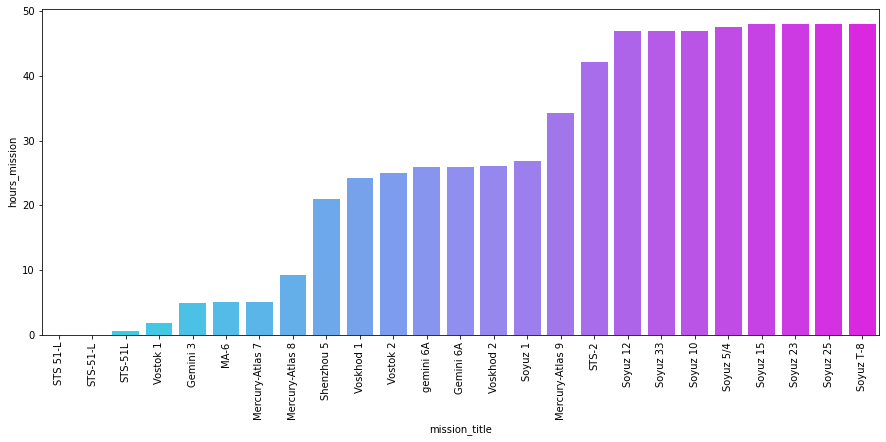

In [43]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
pl = sns.barplot(data=less_than_50_hour_mission,x='mission_title', y='hours_mission', palette= 'cool')
plt.show()

The first missions named 'STS 51-L / STS-51_l / STS-51L' are the identical mission, which was the final flight of Space Shuttle Challenger and failed during its ascent phase.

In [44]:
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['mission_title'] == 'STS-51L']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
429,"Smith, Michael John","Smith, Michael John",male,1945,U.S.,military,1980 NASA group 9,1,pilot,1986,STS-51L,STS-51L,explosion,explosion,0.61,0.61,0,0.0,0.0,41
430,"Jarvis, Gregory Bruce","Jarvis, Gregory Bruce",male,1944,U.S.,civilian,PS by SAL,1,PSP,1986,STS-51L,STS-51L,explosion,explosion,0.61,0.61,0,0.0,0.0,42
431,"McAuliffe, Sharon Christa Corrigan","McAuliffe, Sharon Christa Corrigan",female,1948,U.S.,civilian,1985 Teacher in Space,1,PSP,1986,STS-51L,STS-51L,explosion,explosion,0.61,0.61,0,0.0,0.0,38


In [45]:
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['mission_title'] == 'STS 51-L']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
331,"Onizuka, Ellison S.","Onizuka, Ellison S.",male,1946,U.S.,military,NASA-8,2,MSP,1986,STS 51-L,STS 51-L,explosion,explosion,0.0,74.0,0,0.0,0.0,40


In [46]:
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['mission_title'] == 'STS-51-L']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
277,"McNair, Ronald E.","McNair, Ronald E.",male,1950,U.S.,civilian,NASA- 8,2,MSP,1986,STS-51-L,STS-51-L,explosion,explosion,0.0,191.0,0,0.0,12.02,36
287,"Scobee, Francis R.","Scobee, Francis R.",male,1939,U.S.,military,1978 NASA group 8,2,commander,1986,STS-51-L,STS-51-L,explosion,explosion,0.0,168.0,0,0.0,0.00,47
307,"Resnik, Judith A.","Resnik, Judith A.",female,1949,U.S.,civilian,NASA-9,2,MSP,1985,STS-51-L,STS-51-L,explosion,explosion,0.0,144.0,0,0.0,0.00,36


Besides this failed mission, let's check the successful mission with average shortest single duration:

In [47]:
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['mission_title'] == 'Vostok 1']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
0,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,1,pilot,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0,27


As is known to all, Vostok 1 was the first human spaceflight in history. Yuri Gagarin was the first human who crossed into outer space.

So let's get back to other top features with high feature importance regarding to 'hour_mission'.  
* 'in_orbit', 'ascend_shuttle' and 'descend_shuttle' are related with the feature 'mission_title', so we can ignore them for this analysis. 
* so we now check relationship between 'hours_mission' and the features 'eva_hrs_mission' as well as 'year_of_mission'

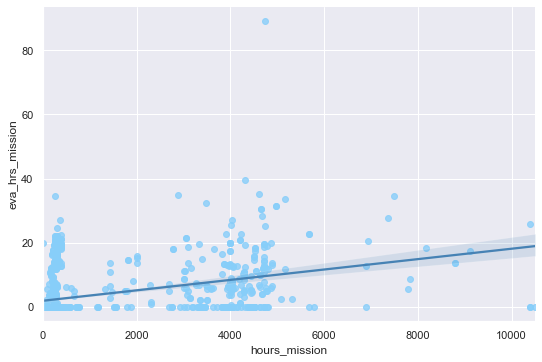

In [49]:
sns.set()
duration_and_eva = sns.lmplot(data=df, x='hours_mission', y='eva_hrs_mission', palette='cool', height=5, 
                              aspect=1.5, line_kws={'color':'steelblue'},scatter_kws={'color':'lightskyblue'})

It seems like, that the longer one single duration of the mission is, the longer eva will take. 

Then the next feature: 
* year of mission

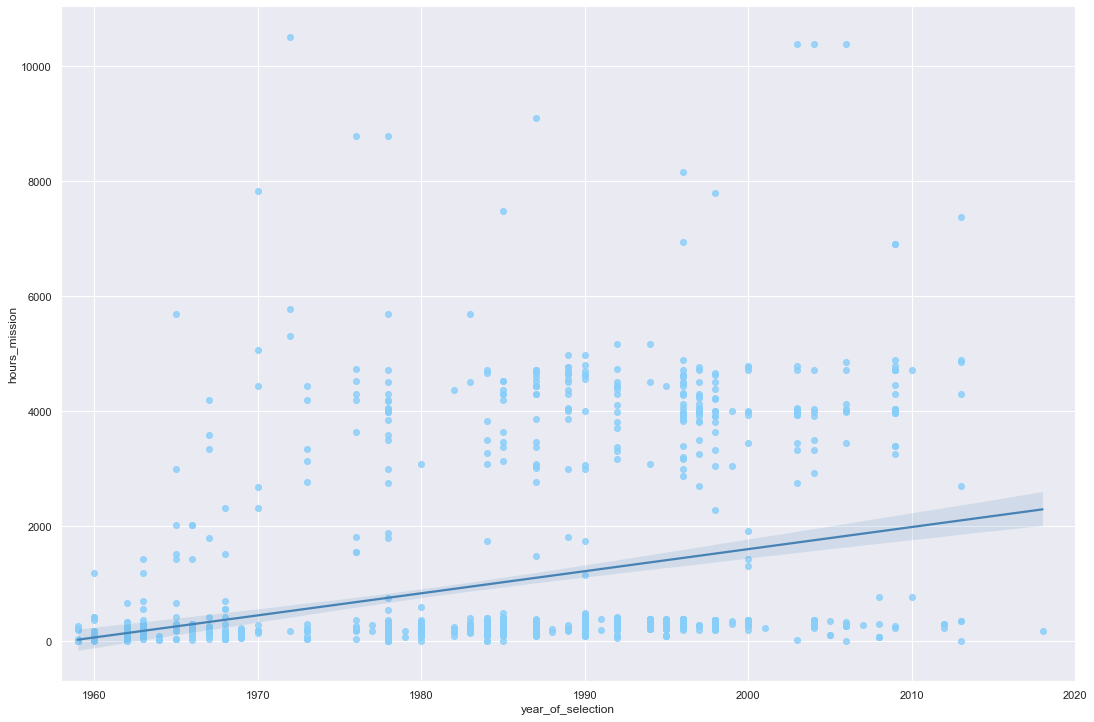

In [51]:
sns.set()
duration_and_year = sns.lmplot(data=df, x='year_of_selection', y='hours_mission', palette='cool', height=10, 
                               aspect=1.5, line_kws={'color':'steelblue'},scatter_kws={'color':'lightskyblue'})
duration_and_year.set(xlim=(1958,2020))

From the plot above, we can see that the single duration of one mission is getting longer and longer.

### 4.2 Which Features are important to Astronaut's Age on Mission? <a name='age'></a> 
To answer this question, let's first take a look at the average/max./min. age of an astronaut:

In [52]:
print('average of age:', round(df['age_of_mission'].mean(),1))
print('oldest astronaut:', round(df['age_of_mission'].max(),1))
print('youngest astronaut:', round(df['age_of_mission'].min(),1))

average of age: 42.9
oldest astronaut: 77
youngest astronaut: 26


In [53]:
# see who was the oldest astronaut
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['age_of_mission'] > 76]

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
3,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,2,PSP,1998,STS-95,STS-95,STS-95,STS-95,213.0,218.0,0,0.0,0.0,77


We notice that he has totally excuted two missions, check his other mission:

In [54]:
# which missons has he excuted
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['number'] == 3]

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
2,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,2,pilot,1962,MA-6,MA-6,MA-6,MA-6,5.0,218.0,0,0.0,0.0,41
3,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,2,PSP,1998,STS-95,STS-95,STS-95,STS-95,213.0,218.0,0,0.0,0.0,77


> 'John Herschel Glenn Jr. was one of the Mercuy Seven, military test pilots selected in 1959 by NASA as the first astronausts of the USA.'   
--Wikipedia

Now let's check which features are most related to the 'age_of_mission'

In [55]:
# make feature set and target set
X_set = label_df.drop(['age_of_mission'], axis=1)
y = label_df['age_of_mission']

# split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_set, y,test_size=0.25, random_state=42)

In [58]:
model_rf = Pipeline([('scalar', StandardScaler()), ('rf_regression', RandomForestRegressor())])
model_rf.fit(X_train, y_train)

print(f'training R2 score: {model_rf.score(X_train, y_train)}')
print(f'test R2 score: {model_rf.score(X_test, y_test)}')

training R2 score: 0.9738318131260889
test R2 score: 0.8129716764175259


**Note**: The trainging data seems to be a little overfitted, but the test score is not bad.

[Text(0, 0, 'sex'),
 Text(0, 1, 'field21'),
 Text(0, 2, 'eva_hrs_mission'),
 Text(0, 3, 'military_civilian'),
 Text(0, 4, 'occupation'),
 Text(0, 5, 'total_number_of_missions'),
 Text(0, 6, 'total_eva_hrs'),
 Text(0, 7, 'ascend_shuttle'),
 Text(0, 8, 'nationality'),
 Text(0, 9, 'descend_shuttle'),
 Text(0, 10, 'original_name'),
 Text(0, 11, 'name'),
 Text(0, 12, 'year_of_selection'),
 Text(0, 13, 'total_hrs_sum'),
 Text(0, 14, 'selection'),
 Text(0, 15, 'hours_mission'),
 Text(0, 16, 'mission_title'),
 Text(0, 17, 'id'),
 Text(0, 18, 'number'),
 Text(0, 19, 'nationwide_number'),
 Text(0, 20, 'in_orbit'),
 Text(0, 21, 'year_of_birth'),
 Text(0, 22, 'year_of_mission'),
 Text(0, 23, 'mission_number'),
 Text(0, 24, 'age_of_selection')]

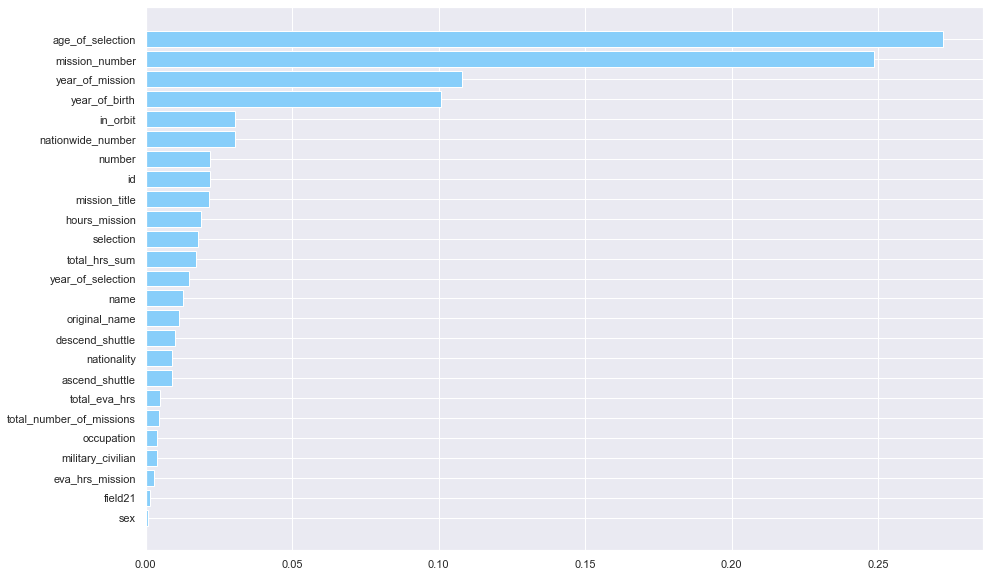

In [59]:
importances = model_rf[1].feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(15,10))
ax.barh(range(len(importances)), importances[indices], color='lightskyblue')
ax.set_yticks(range(len(importances)))
ax.set_yticklabels(np.array(X_train.columns)[indices])

* 'age_of_selection' can be represented by 'age_of_mission', so we ignore it for now.  
* 'year_of_birth' can be replaced by feature 'year_of_mission', so we ignore it for now.
* Let's check the three important featrues: 'mission_number', 'year_of_mission' and 'mission_title'

In [61]:
# group the data by mission_number to see what is the average age for the missions with a certain mission number
mission_number_and_age = df[['mission_number','age_of_mission']].sort_values(by='mission_number')
mission_number_and_age.groupby(by='mission_number').mean()

,age_of_mission
mission_number,
1,40.304965
2,43.667582
3,45.163366
4,47.333333
5,48.970588
6,50.222222
7,53.000000


We see that the average age of the astronauts is getting bigger when mission number increases. This is also logical, because many astronauts excute the same mission for several times.

Let's see the boxplot for this relationship:

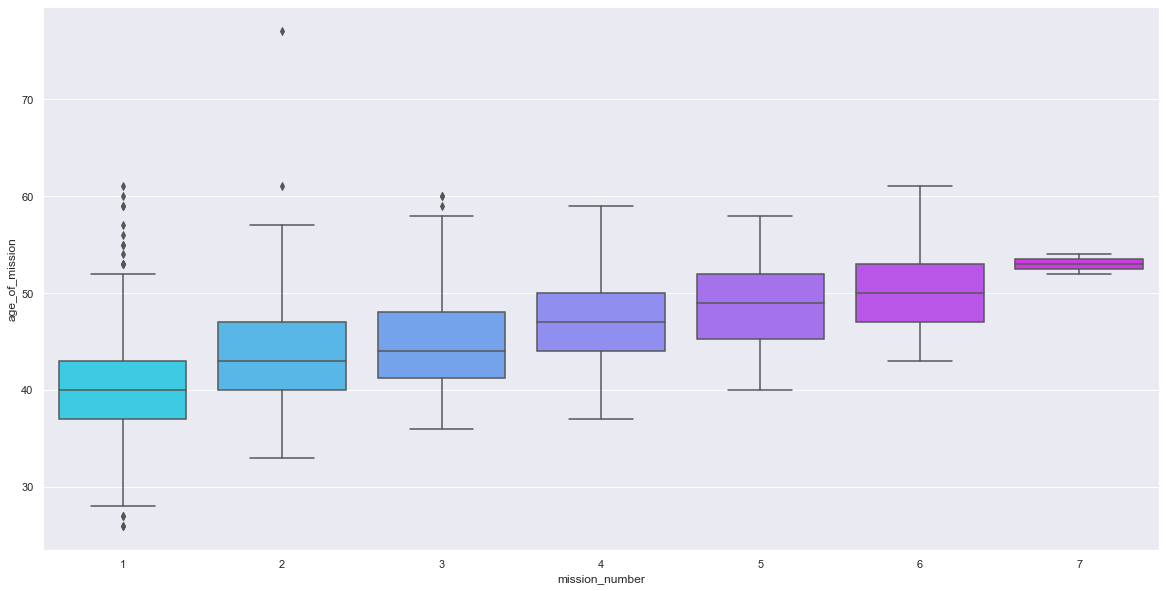

In [62]:
fig, ax1 = plt.subplots(figsize=(20,10))
age_mission_number = sns.boxplot(data=mission_number_and_age, x='mission_number', y='age_of_mission', ax=ax1, palette='cool')

Now let's check the other important featrue:   
* year_of_mission

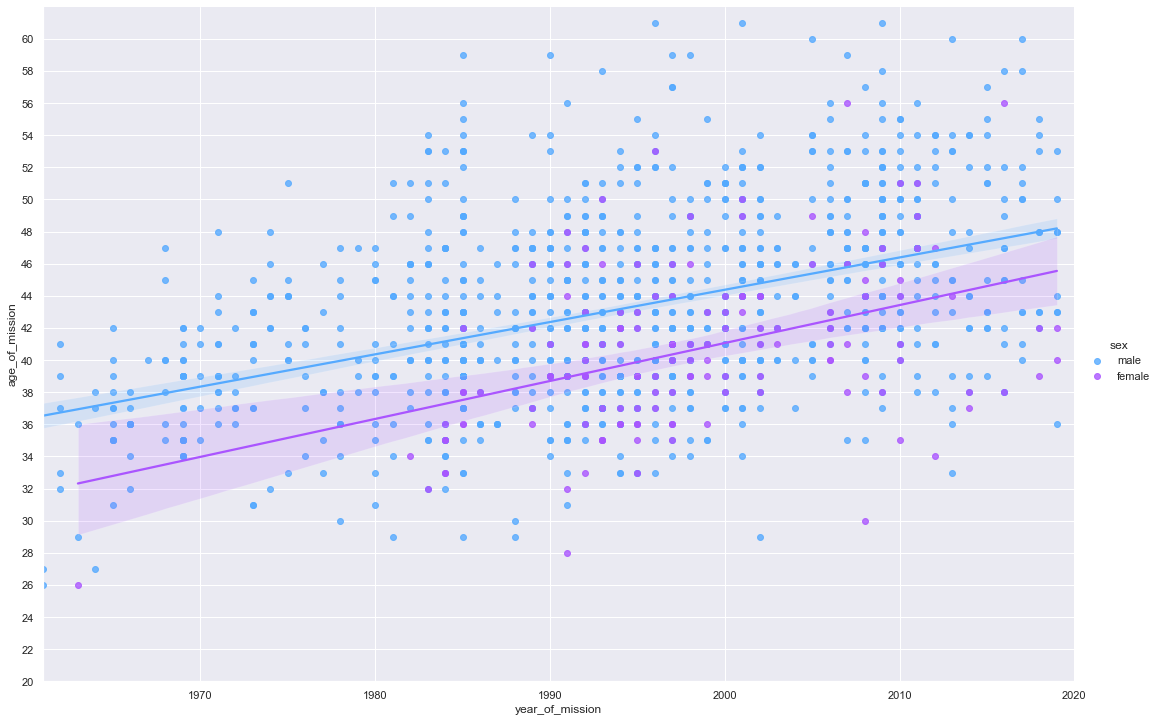

In [64]:
sns.set()
ageByYear = sns.lmplot(data=df, x='year_of_mission', y='age_of_mission', hue='sex', palette='cool', height=10, aspect=1.5)
ageByYear.set(xlim=(1961,2020), ylim=(20,62), yticks=np.arange(20,62,2))

From the plot above, we conclude that the astronaut's age is getting older and older and male astronauts are generally older than femal astronauts.

Now let's look at the next important feature: 
* mission_title

In [66]:
# get the average age of astronauts for one mission
mission_title_and_age = df[['mission_title','age_of_mission']].groupby(by='mission_title').mean()
mission_title_and_age['mission_title'] = mission_title_and_age.index
mission_title_and_age = mission_title_and_age.sort_values(by='age_of_mission', ascending=False)

First check the distribution of the average age:

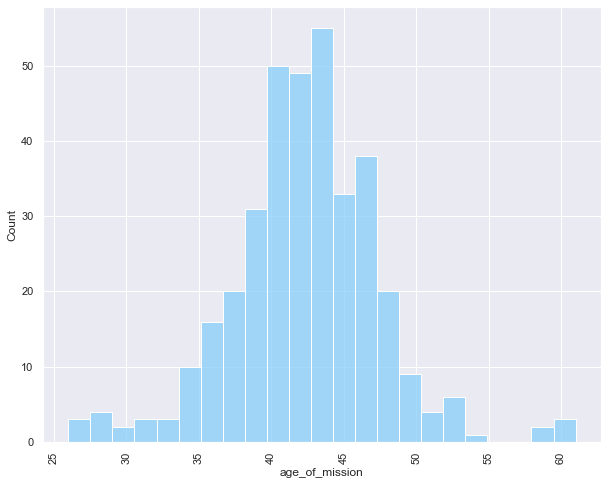

In [67]:
fig, ax1 = plt.subplots(figsize=(10,8))
plt.xticks(rotation=90)
ageOfMission = sns.histplot(data=mission_title_and_age, x='age_of_mission',ax=ax1, fill=True, color='lightskyblue')

Most of the astronauts are between 35 to 50 on mission.  
So we take a look at the missions with the astronauts over 50-year-old and unter 35-year-old separately:

In [68]:
mission_with_astronauts_over_50 = mission_title_and_age.loc[mission_title_and_age['age_of_mission'] > 50]
mission_with_astronauts_over_50['mission_title'] = mission_with_astronauts_over_50.index
mission_with_astronauts_over_50 = mission_with_astronauts_over_50.sort_values(by=['age_of_mission'], ascending=False)
mission_with_astronauts_over_50

<ipython-input-68-c6de340dfaed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mission_with_astronauts_over_50['mission_title'] = mission_with_astronauts_over_50.index


,age_of_mission,mission_title
mission_title,,
ЭП-1,61.000000,ЭП-1
Soyuz TMA-14,61.000000,Soyuz TMA-14
Soyuz TMA-7,60.000000,Soyuz TMA-7
STS­ 91,59.000000,STS­ 91
Soyuz TMA-10,59.000000,Soyuz TMA-10
43,54.333333,43
Euromir 94,53.000000,Euromir 94
Spacelab-3,53.000000,Spacelab-3
38,52.333333,38


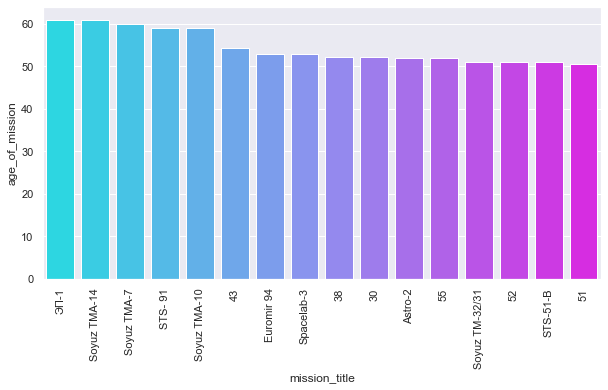

In [69]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
pl = sns.barplot(data=mission_with_astronauts_over_50,x='mission_title', y='age_of_mission', palette= 'cool')
plt.show()

Missions with only one astronaut are actually not convincing, so let's check the missions with more than two astronauts:

In [70]:
df['mission_title'].loc[df['mission_title'].isin(mission_with_astronauts_over_50.index)].value_counts()

STS-51-B          4
43                3
38                3
30                3
52                3
55                3
Soyuz TM­32/31    2
51                2
Soyuz TMA-14      1
Soyuz TMA-10      1
ЭП-1              1
Spacelab-3        1
Astro-2           1
STS­ 91           1
Euromir 94        1
Soyuz TMA-7       1
Name: mission_title, dtype: int64

In [71]:
# mission STS-51-B
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['mission_title'] == 'STS-51-B']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
217,"Overmyer, Robert F.","Overmyer, Robert F.",male,1936,U.S.,military,MOL-2 / NASA-7,2,commander,1985,STS-51-B,STS-51-B,STS-51-B,STS-51-B,168.0,290.00,0,0.0,0.0,49
260,"Thornton, William E.","Thornton, William E.",male,1929,U.S.,civilian,1967 NASA group,2,MSP,1985,STS-51-B,STS-51-B,STS-51-B,STS-51-B,169.0,313.26,0,0.0,0.0,56
349,"Gregory, Frederick D.","Gregory, Frederick D.",male,1941,U.S.,military,NASA Astronaut Group 8,3,pilot,1985,STS-51-B,STS-51-B,STS-51-B,STS-51-B,168.0,455.00,0,0.0,0.0,44
352,"Lind, Don L.","Lind, Don L.",male,1930,U.S.,military,NASA- 5,1,MSP,1985,STS-51-B,STS-51-B,STS-51-B,STS-51-B,168.0,168.00,0,0.0,0.0,55


In [73]:
# Mission Expedition 55
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['mission_title'] == '55']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
1169,"Arnold, Richard R., II","Arnold, Richard R., II",male,1963,U.S.,civilian,NASA- 19,2,flight engineer,2018,55,Soyuz MS-08,ISS,Soyuz MS-08,4722.0,307.0,3,19.50,32.07,55
1178,"Feustel, Andrew J.","Feustel, Andrew J.",male,1965,U.S.,civilian,NASA- 18,3,flight engineer,2018,55,Soyuz MS-08,ISS,Soyuz MS-08,4722.0,687.0,3,19.50,61.80,53
1244,"Artemyev, Oleg",Олег Германович Артемьев,male,1970,U.S.S.R/Russia,military,RKKE-15,2,commander,2018,55,Soyuz MS-08,ISS,Soyuz MS-08,4722.0,8784.0,1,7.77,20.34,48


In [74]:
# Mission Expedition 52
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['mission_title'] == '52']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
1118,"Nespoli, Paolo A.","Nespoli, Paolo A.",male,1957,Italy,military,1998 ESA Group,3,flight engineer,2017,52,Soyuz MS-05,ISS,Soyuz MS-05,3328.93,7514.61,0,0.0,0.00,60
1200,"Bresnik, Randolph J.","Bresnik, Randolph J.",male,1967,U.S.,military,NASA- 19,2,flight engineer,2017,52,Soyuz MS-05,ISS,Soyuz MS-05,3328.93,3587.93,3,19.5,31.33,50
1241,"Ryazanski, Sergei",Сергей Николаевич Рязанский,male,1974,U.S.S.R/Russia,civilian,IMBP-6,2,commander,2017,52,Soyuz MS-05,ISS,Soyuz MS-05,3328.93,7318.93,1,7.0,26.92,43


In [75]:
# Mission Expedition 38
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'],
        axis=1).loc[df['mission_title'] == '38']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
848,"Wakata, Koichi",若田光一,male,1963,Japan,civilian,NASDA-2,4,commander,2013,38,Soyuz TMA-11M,ISS,Soyuz TMA-11M,4509.75,8336.50,0,0.00,0.00,50
978,"Mastracchio, Richard A.","Mastracchio, Richard A.",male,1960,U.S.,civilian,NASA- 16,4,flight engineer,2014,38,Soyuz TMA-11M,ISS,Soyuz TMA-11M,4509.00,5460.00,3,14.57,53.07,54
1007,"Tyurin, Mikhail",Михаил Владиславович Тюрин,male,1960,U.S.S.R/Russia,military,NPOE-11,3,commander,2013,38,Soyuz TMA­11M,ISS,Soyuz TMA­11M,4509.00,12770.85,0,0.00,25.52,53


In [76]:
# Mission Expedition 30
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['mission_title'] == '30']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
1051,"Pettit, Donald R.","Pettit, Donald R.",male,1955,U.S.,civilian,NASA-16,3,flight engineer,2011,30,Soyuz TMA-03M,ISS,Soyuz TMA-03M,4627.0,8872.5,0,0.00,13.28,56
1061,"Kuipers, Andre","Kuipers, Andre",male,1958,Netherland,civilian,1998 ESA Group,2,flight engineer,2012,30,Soyuz TMA-03M,ISS,Soyuz TMA-03M,4627.0,4888.0,0,0.00,0.00,54
1136,"Kononenko, Oleg D.",Олег Дмитриевич Кононенко,male,1964,U.S.S.R/Russia,military,MKS,4,commander,2011,30,Soyuz TMA­03M,ISS,Soyuz TMA­03M,4626.0,16081.0,1,6.25,32.20,47


In [77]:
# Mission Expedition 43
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['mission_title'] == '43']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
945,"Padalka, Gennady",Геннадий Иванович Падалка,male,1958,U.S.S.R/Russia,military,TsPK-10,5,commander,2015,43,Soyuz TMA­16M,ISS,Soyuz TMA­16M,4037.0,21083.52,1,5.57,37.95,57
967,"Kelly, Scott J.","Kelly, Scott J.",male,1964,U.S.,military,NASA- 16,4,flight engineer,2015,43,Soyuz TMA-16M,ISS,Soyuz TMA-18M,8163.0,12490.00,3,18.33,18.33,51
1209,"Korniyenko, Mikhail",Михаил Борисович Корниенко,male,1960,U.S.S.R/Russia,civilian,RKKE-14,2,flight engineer,2015,43,Soyuz TMA­16M,ISS,Soyuz TMA­18M,7798.0,12005.43,1,5.57,12.28,55


Now let's check the missions with the average youngest astronauts:

In [78]:
mission_with_astronauts_under_35 = mission_title_and_age.loc[mission_title_and_age['age_of_mission'] < 35]
mission_with_astronauts_under_35['mission_title'] = mission_with_astronauts_under_35.index
mission_with_astronauts_under_35 = mission_with_astronauts_under_35.sort_values(by=['age_of_mission'], ascending=True)
mission_with_astronauts_under_35

<ipython-input-78-4d7a251fa1a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mission_with_astronauts_under_35['mission_title'] = mission_with_astronauts_under_35.index


,age_of_mission,mission_title
mission_title,,
Vostok 6,26.0,Vostok 6
Vostok 2,26.0,Vostok 2
Vostok 1,27.0,Vostok 1
Soyuz TM-12/11,28.0,Soyuz TM-12/11
Soyuz 40,29.0,Soyuz 40
Vostok 5,29.0,Vostok 5
Soyuz TM-34 / Soyuz TM-33,29.0,Soyuz TM-34 / Soyuz TM-33
Soyuz 28,30.0,Soyuz 28
Soyuz TMA-12 / Soyuz TMA-11,30.0,Soyuz TMA-12 / Soyuz TMA-11


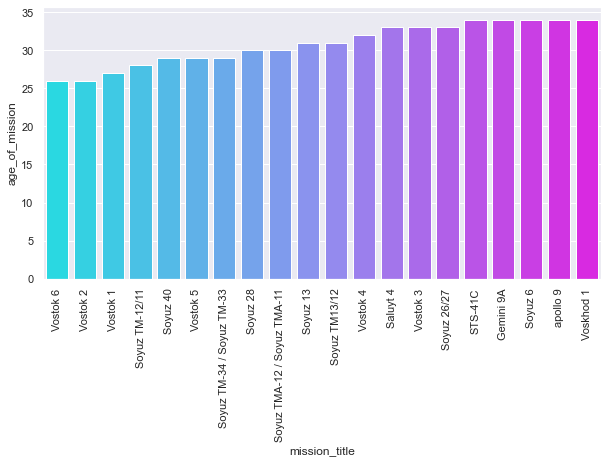

In [79]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
pl = sns.barplot(data=mission_with_astronauts_under_35,x='mission_title', y='age_of_mission', palette= 'cool')
plt.show()

Same, missions with only one astronaut are actually not convincing, so let's check the missions with more than two astronauts:

In [80]:
df['mission_title'].loc[df['mission_title'].isin(mission_with_astronauts_under_35.index)].value_counts()

Voskhod 1                      3
Soyuz 13                       2
Soyuz 6                        2
Gemini 9A                      2
STS-41C                        1
Vostok 3                       1
Soyuz TM13/12                  1
Soyuz TM-12/11                 1
Soyuz 26/27                    1
Vostok 1                       1
Vostok 6                       1
Vostok 4                       1
Vostok 2                       1
Soyuz 40                       1
Soyuz TM-34 / Soyuz TM-33      1
Soyuz TMA-12 / Soyuz TMA-11    1
Soyuz 28                       1
Vostok 5                       1
apollo 9                       1
Saluyt 4                       1
Name: mission_title, dtype: int64

In [81]:
# Mission Voskhod 1
df.drop(['id', 'number', 'nationwide_number', 'year_of_selection', 'age_of_selection', 'mission_number'], 
        axis=1).loc[df['mission_title'] == 'Voskhod 1']

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission
18,"Komarov, Vladimir",КОМАРОВ Владимир Михайлович,male,1927,U.S.S.R/Russia,military,TsPK-1,2,commander,1964,Voskhod 1,Voskhod 1,Voskhod 1,Voskhod 1,24.28,51.07,0,0.0,0.0,37
20,"Feoktistov, Konstantin",ФЕОКТИСТОВ Константин Петрович,male,1926,U.S.S.R/Russia,civilian,Voskhod-1 / TsKBEM-1,1,MSP,1964,Voskhod 1,Voskhod 1,Voskhod 1,Voskhod 1,24.28,24.28,0,0.0,0.0,38
21,"Yegorov, Boris",ЕГОРОВ Борис Борисович,male,1937,U.S.S.R/Russia,civilian,Voskhod-1,1,MSP,1964,Voskhod 1,Voskhod 1,Voskhod 1,Voskhod 1,24.28,24.28,0,0.0,0.0,27


> 'Voskhod 1 achieved a number of 'firsts' in the history of crewed spaceflight, being the first space flight to carry more than one crew into orbit, the first flight without the use of spacesuits, and the first to carry either an eigineer or a physician into outer space.'  
-- wikipedia

### 4.3 What are important to Astronaut Training Time?  <a name='training'></a>
We define: traing time = time from **selected** to **first space mission**

In [82]:
# select only the row of first mission for each astronaut and create a new feature: traing_time_to_first_mission
first_mission_df = df.groupby('number').first().reset_index()
first_mission_df['traing_time_to_first_mission'] = first_mission_df['year_of_mission'] - first_mission_df['year_of_selection']
first_mission_df

,number,id,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_selection,age_of_mission,traing_time_to_first_mission
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,...,Vostok 2,Vostok 3,1.77,1.77,0,0.00,0.00,26,27,1
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,...,Vostok 2,Vostok 2,25.00,25.30,0,0.00,0.00,25,26,1
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,...,MA-6,MA-6,5.00,218.00,0,0.00,0.00,38,41,3
3,4,5,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,...,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.00,0.00,34,37,3
4,5,6,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-1,...,Vostok 3,Vostok 3,94.00,519.33,0,0.00,0.00,31,33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,561,1273,345,"McClain, Anne Charlotte","McClain, Anne Charlotte",female,1979,U.S.,military,NASA-21,...,ISS,Soyuz MS-11,4887.00,4887.00,2,13.13,13.13,34,39,5
560,562,1274,346,"Koch, Christina","Koch, Christina",female,1979,U.S.,civilian,NASA-21,...,ISS,not completed yet,7372.30,7372.30,4,27.80,27.80,34,40,6
561,563,1275,347,"Morgan, Andrew","Morgan, Andrew",male,1976,U.S.,military,NASA-21,...,ISS,not completed yet,4303.08,4303.08,6,39.52,39.52,37,43,6
562,564,1276,348,"Meir, Jessica","Meir, Jessica",female,1977,U.S.,civilian,NASA-21,...,ISS,not completed yet,2697.60,2697.60,1,7.28,7.28,36,42,6


Let's check the average / max. / min. time to first mission:

In [83]:
print('average training time to first mission:', round(first_mission_df['traing_time_to_first_mission'].mean(), 2))
print('max. training time to first mission:', round(first_mission_df['traing_time_to_first_mission'].max(), 2))
print('min. training time to first mission:', round(first_mission_df['traing_time_to_first_mission'].min(), 2))

average training time to first mission: 6.0
max. training time to first mission: 21
min. training time to first mission: -9


**Note:** negative time should not appear! So let's check which values are wrong:

In [84]:
first_mission_df.drop(['id', 'number', 'nationwide_number','occupation', 'age_of_selection','total_number_of_missions', 
                       'mission_number'], axis=1).loc[first_mission_df['traing_time_to_first_mission'] < 0]

,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,year_of_selection,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_mission,traing_time_to_first_mission
280,Franco Malerba,Franco Malerba,male,1946,Italy,civilian,1989 ESA Group,1998,1992,sts-46,STS-46,STS-46,STS-46,191.25,191.25,0,0.0,0.00,46,-6
348,"Thomas, Andrew S. W.","Thomas, Andrew S. W.",male,1951,Australia,civilian,1992 NASA group,1992,1983,STS-77,STS-77,STS-77,STS-77,240.00,4264.00,0,0.0,6.35,32,-9


It seems to be typing mistake:  
year_of_selection for the mission STS-46 should be 1989 instead of 1998 and year_of_mission for the mission STS-77 should be 1996 (according to wikipedia).

In [85]:
# correct the mistake in dataset
first_mission_df['year_of_selection'].loc[first_mission_df['name'] == 'Franco Malerba'] = 1989
first_mission_df['year_of_mission'].loc[first_mission_df['name'] == 'Thomas, Andrew S. W.'] = 1996

# check the training time again
first_mission_df['traing_time_to_first_mission'] = first_mission_df['year_of_mission'] - first_mission_df['year_of_selection']
print('average training time to first mission:', round(first_mission_df['traing_time_to_first_mission'].mean(), 2))
print('max. training time to first mission:', round(first_mission_df['traing_time_to_first_mission'].max(), 2))
print('min. training time to first mission:', round(first_mission_df['traing_time_to_first_mission'].min(), 2))

average training time to first mission: 6.04
max. training time to first mission: 21
min. training time to first mission: 0


C:\Program Files\Anaconda1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Encode the non-numeric features as preparing for the analysis of feature importance:

In [86]:
# find the non-numeric features
non_numeric = (first_mission_df.dtypes == 'object')
object_cols = list(non_numeric[non_numeric].index)
print(object_cols)

['name', 'original_name', 'sex', 'nationality', 'military_civilian', 'selection', 'occupation', 'mission_title', 'ascend_shuttle', 'in_orbit', 'descend_shuttle']


In [87]:
# make a copy to avoid changing original data
label_first_mission_df = first_mission_df.copy()

# Apply label encoder to each non-numeric feature
label_encoder = LabelEncoder()
for col in object_cols:
    label_first_mission_df[col] = label_encoder.fit_transform(label_first_mission_df[col])

label_first_mission_df.head()

,number,id,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_of_selection,age_of_mission,traing_time_to_first_mission
0,1,1,1,167,456,1,1934,35,1,181,...,229,307,1.77,1.77,0,0.0,0.0,26,27,1
1,2,2,2,496,511,1,1935,35,1,181,...,229,306,25.00,25.30,0,0.0,0.0,25,26,1
2,3,3,1,183,147,1,1921,34,1,92,...,20,21,5.00,218.00,0,0.0,0.0,38,41,3
3,4,5,2,81,59,1,1925,34,1,109,...,21,22,5.00,5.00,0,0.0,0.0,34,37,3
4,5,6,2,357,485,1,1929,35,1,181,...,230,307,94.00,519.33,0,0.0,0.0,31,33,2


In [88]:
label_first_mission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   number                        564 non-null    int64  
 1   id                            564 non-null    int64  
 2   nationwide_number             564 non-null    int64  
 3   name                          564 non-null    int32  
 4   original_name                 564 non-null    int32  
 5   sex                           564 non-null    int32  
 6   year_of_birth                 564 non-null    int64  
 7   nationality                   564 non-null    int32  
 8   military_civilian             564 non-null    int32  
 9   selection                     564 non-null    int32  
 10  year_of_selection             564 non-null    int64  
 11  mission_number                564 non-null    int64  
 12  total_number_of_missions      564 non-null    int64  
 13  occup

In [89]:
# make feature set and target set
X_set = label_first_mission_df.drop(['traing_time_to_first_mission'], axis=1)
y = label_first_mission_df['traing_time_to_first_mission']

In [90]:
# split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_set, y,test_size=0.25, random_state=15)

In [91]:
model_rf = Pipeline([('scalar', StandardScaler()), ('rf_regression', RandomForestRegressor())])
model_rf.fit(X_train, y_train)

print(f'training R2 score: {model_rf.score(X_train, y_train)}')
print(f'test R2 score: {model_rf.score(X_test, y_test)}')

training R2 score: 0.9838077809011638
test R2 score: 0.8403558427181828


[Text(0, 0, 'mission_number'),
 Text(0, 1, 'sex'),
 Text(0, 2, 'field21'),
 Text(0, 3, 'military_civilian'),
 Text(0, 4, 'eva_hrs_mission'),
 Text(0, 5, 'occupation'),
 Text(0, 6, 'total_eva_hrs'),
 Text(0, 7, 'total_number_of_missions'),
 Text(0, 8, 'year_of_birth'),
 Text(0, 9, 'name'),
 Text(0, 10, 'nationality'),
 Text(0, 11, 'number'),
 Text(0, 12, 'original_name'),
 Text(0, 13, 'ascend_shuttle'),
 Text(0, 14, 'year_of_mission'),
 Text(0, 15, 'descend_shuttle'),
 Text(0, 16, 'total_hrs_sum'),
 Text(0, 17, 'id'),
 Text(0, 18, 'hours_mission'),
 Text(0, 19, 'selection'),
 Text(0, 20, 'nationwide_number'),
 Text(0, 21, 'in_orbit'),
 Text(0, 22, 'year_of_selection'),
 Text(0, 23, 'mission_title'),
 Text(0, 24, 'age_of_mission'),
 Text(0, 25, 'age_of_selection')]

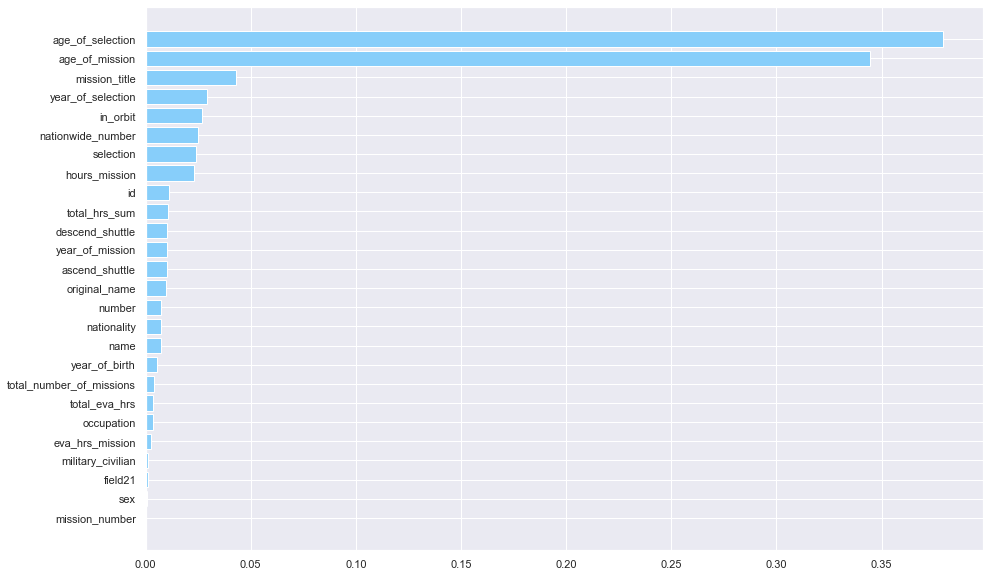

In [92]:
importances = model_rf[1].feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(15,10))
ax.barh(range(len(importances)), importances[indices], color='lightskyblue')
ax.set_yticks(range(len(importances)))
ax.set_yticklabels(np.array(X_train.columns)[indices])

* The feature 'age_of_selection' can also represent the feature 'age_of_mission', so we just take a closer look at 'age_of_selection'.  
* The feature 'year_of_selection' plays also a role.

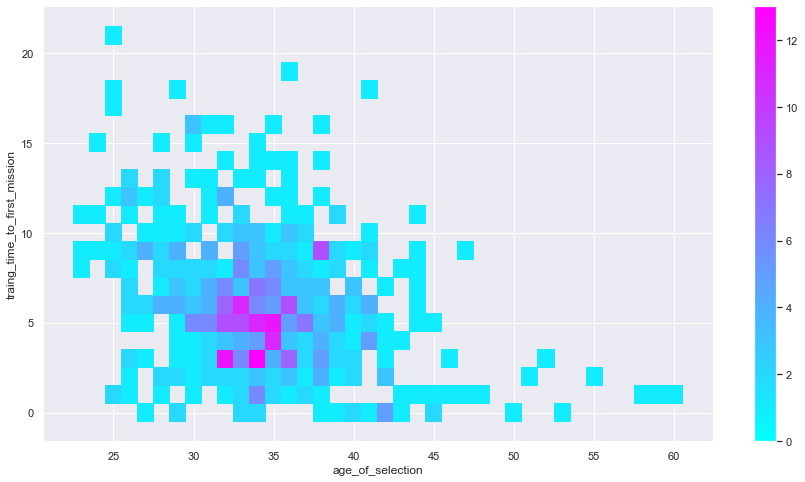

In [94]:
fig, ax1 = plt.subplots(figsize=(15,8))

trainging_time_age = sns.histplot(y='traing_time_to_first_mission',x='age_of_selection', ax=ax1, 
                                  data=first_mission_df, bins=30, discrete=(True, True), cbar=True, cmap='cool')

It seems that the two features are negative correlated, let's check the lmplot to take a closer look:

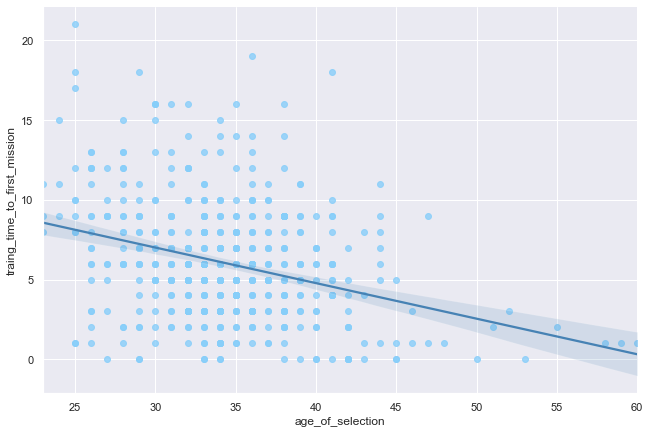

In [95]:
sns.set()
training_time_age = sns.lmplot(data=first_mission_df, x='age_of_selection',  y='traing_time_to_first_mission', 
                               palette='cool', height=6, aspect=1.5, line_kws={'color':'steelblue'},scatter_kws={'color':'lightskyblue'})

That indicates: the younger an astronaut by the selection is, the more training time he/she needs till his/her first mission.

Now let's check the second important feature: 
* year_of_selection

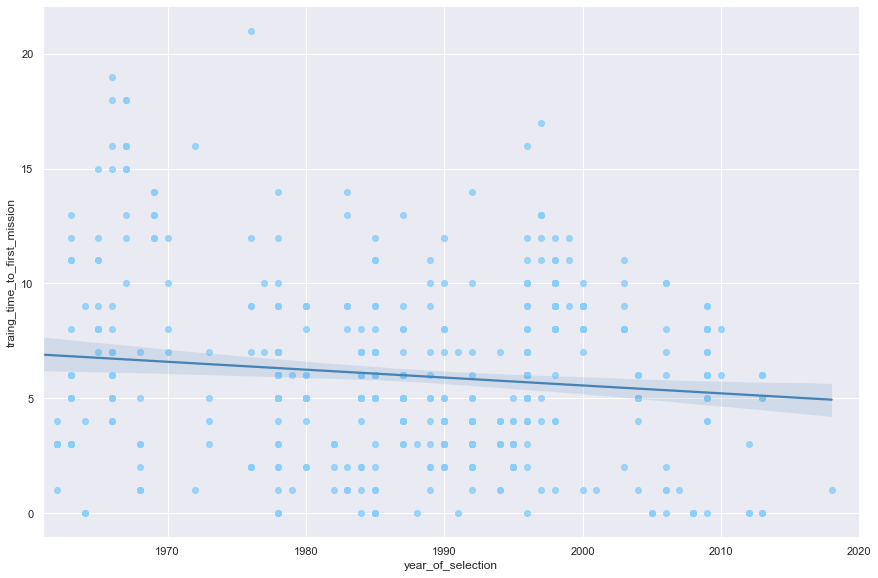

In [96]:
sns.set()
training_time_year = sns.lmplot(data=first_mission_df, x='year_of_selection', y='traing_time_to_first_mission', palette='cool', 
                                height=8, aspect=1.5, line_kws={'color':'steelblue'},scatter_kws={'color':'lightskyblue'})
training_time_year.set(xlim=(1961,2020))

From the plot above, we know that the training time till the first mission is getting shorter and shorter.

### 4.4 Sex, Occupation and Military/Civilian<a name='sex'></a>
Next let's take a look at the proportion of the female missions:

In [97]:
df['sex'].value_counts()

male      1134
female     143
Name: sex, dtype: int64

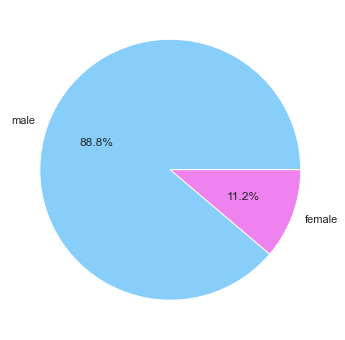

In [98]:
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(df['sex'].value_counts(), autopct='%1.1f%%', labels=('male','female'), colors=['lightskyblue','violet'])
plt.show()

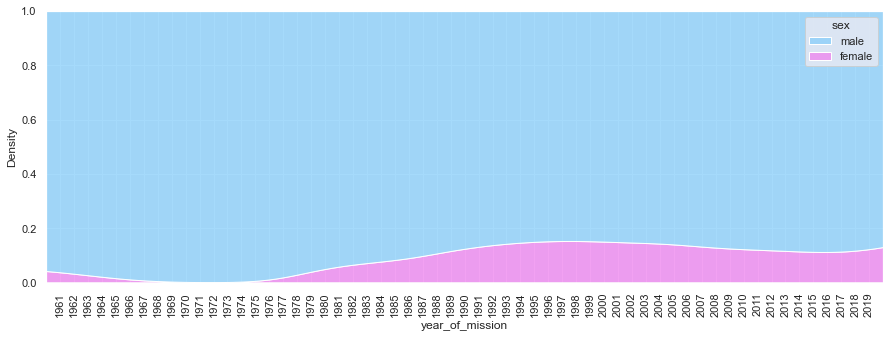

In [99]:
# see if the proportion changed by the year
fig, ax1 = plt.subplots(figsize=(15,5))
plt.xticks(rotation=90)
plt.xticks(np.arange(df['year_of_mission'].values.min(),df['year_of_mission'].values.max()+1))
plt.xlim(df['year_of_mission'].values.min()-1, df['year_of_mission'].values.max()+1)
histSexByYear = sns.kdeplot(data=df, x='year_of_mission',ax=ax1, hue='sex', palette=['lightskyblue','violet'], multiple='fill')

Since the end of 1970s, there were more female missions. However, the proportion of female missions stayed same till now. 

Then let's look at the occupation of the astronaut on mission:

In [100]:
df['occupation'].value_counts()

MSP                                             498
commander                                       315
pilot                                           197
flight engineer                                 196
PSP                                              59
Other (space tourist/journalist/participant)     12
Name: occupation, dtype: int64

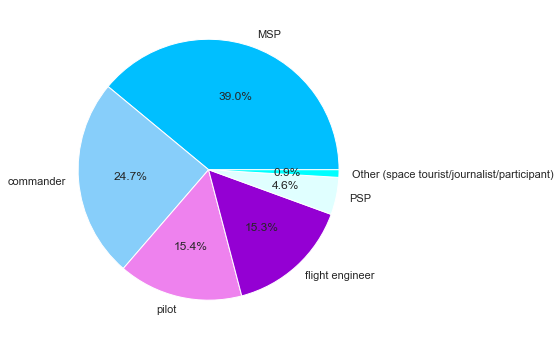

In [101]:
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(df['occupation'].value_counts(), autopct='%1.1f%%', labels=('MSP','commander', 'pilot', 'flight engineer', 'PSP', 'Other (space tourist/journalist/participant)'), colors=['deepskyblue', 'lightskyblue', 'violet', 'darkviolet', 'lightcyan', 'cyan'])
plt.show()

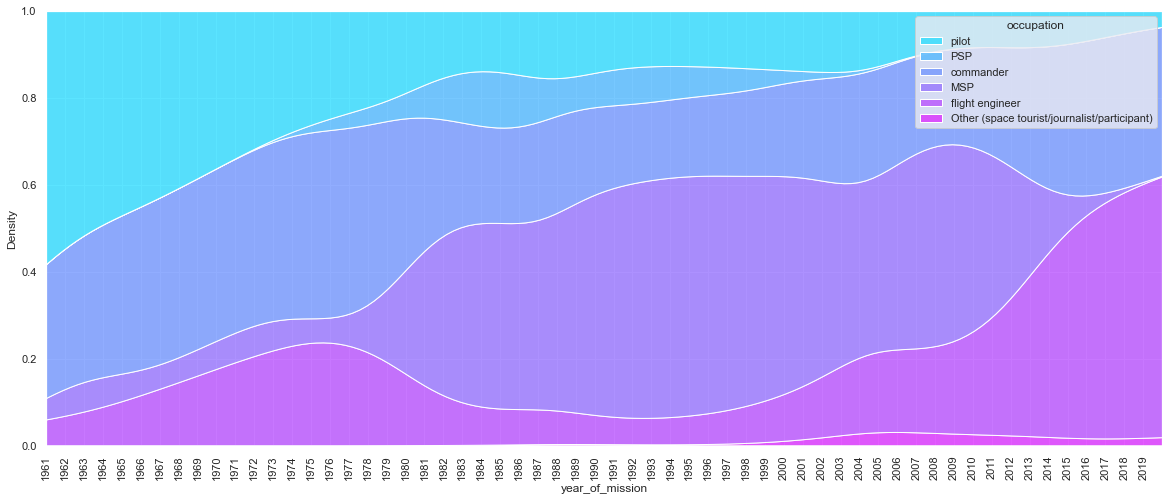

In [102]:
# see if the proportion of the occupations changed by the year
fig, ax1 = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=90)
plt.xticks(np.arange(df['year_of_mission'].values.min(),df['year_of_mission'].values.max()+1))
plt.xlim(df['year_of_mission'].values.min(), df['year_of_mission'].values.max()+1)
histOccupationByYear = sns.kdeplot(data=df, x='year_of_mission',ax=ax1, hue='occupation', palette='cool', multiple='fill')

From the plot above, we can tell that the proportion of the flight engineer is since 2004 increasing and the proportion of the pilot is getting smaller. Since begin 2000, the proportion of space tourist/ journalist / participant increased.  
**Note**: This year, 2021, more space tourists/ participants went into the space (Virgin Galactic, Blur Origin, SpaceX and Soyuz MS-19).

Now let's take a look at the proportion of military_civilian:

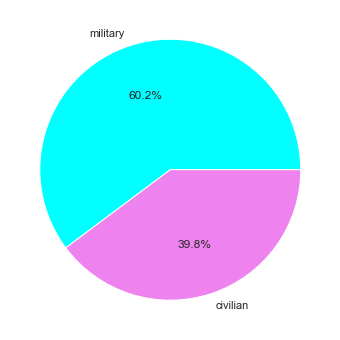

In [103]:
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(df['military_civilian'].value_counts(), autopct='%1.1f%%', labels=('military', 'civilian'), colors=['cyan', 'violet'])
plt.show()

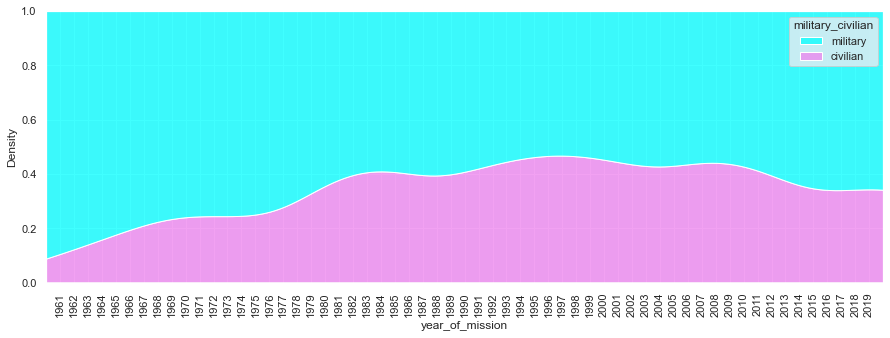

In [104]:
fig, ax1 = plt.subplots(figsize=(15,5))
plt.xticks(rotation=90)
plt.xticks(np.arange(df['year_of_mission'].values.min(),df['year_of_mission'].values.max()+1))
plt.xlim(df['year_of_mission'].values.min()-1, df['year_of_mission'].values.max()+1)
porpOfMilitaryByYear = sns.kdeplot(data=df, x='year_of_mission',ax=ax1, hue='military_civilian', palette=['cyan', 'violet'], 
                                   multiple='fill')

We see that since the end of 1970s the proportion of civilian has increased, however, this proportion stayed almost same till now.

### 4.5 Nationality <a name='nationality'></a>
The development of the space exploration varies from nation to nation. Let's take a closer look.

*** How many times has each nation sent astronaut into the space?**

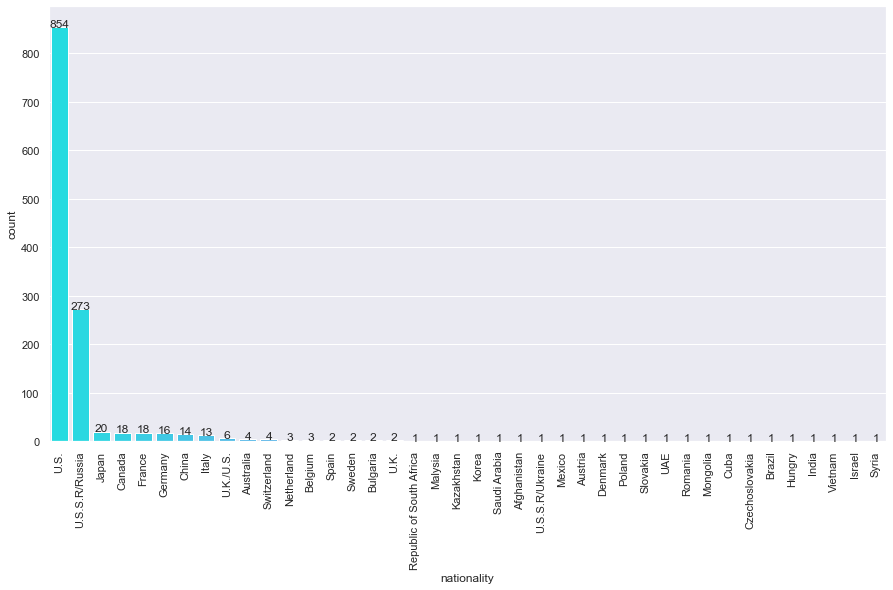

In [105]:
countNationality = df['nationality'].value_counts()
fig, ax1 = plt.subplots(figsize=(15,8))
plt.xticks(rotation=90)
NationalityGraph = sns.countplot(x='nationality',ax=ax1, data=df, order=countNationality.index, palette='cool')
for p in NationalityGraph.patches:
    height = p.get_height()
    NationalityGraph.text(p.get_x() + p.get_width()/2., height + 0.1, height, ha='center')

*** When began the space exploration in each nation?**

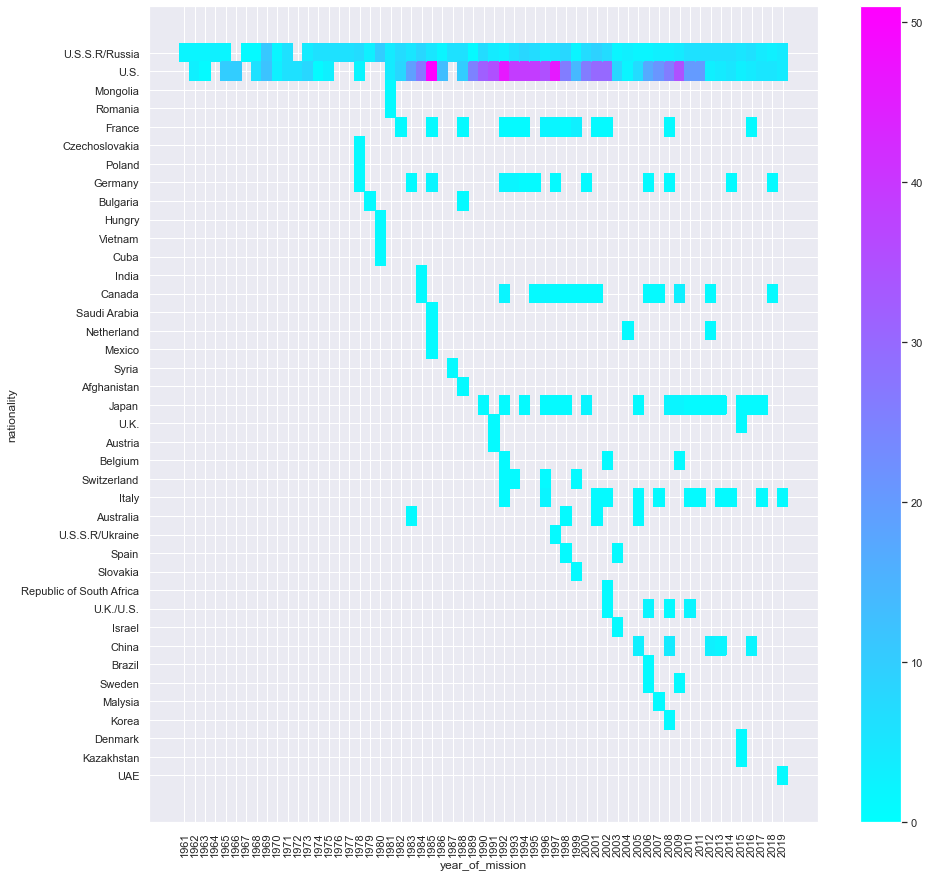

In [106]:
countNationalityByYear = df['nationality'].value_counts()
fig, ax1 = plt.subplots(figsize=(15,15))
plt.xticks(rotation=90)
plt.xticks(np.arange(df['year_of_mission'].values.min(),df['year_of_mission'].values.max()+1))
NationalityGraphByYear = sns.histplot(y='nationality',x='year_of_mission', ax=ax1, data=df, bins=50, discrete=(True, True), 
                                      cbar=True, cmap='cool')

*** How has the proportion of missions by nations changed?**  
(top 10 nations with the most missions)

In [107]:
top10Nations = df['nationality'].value_counts().nlargest(10).index
top10Nations

Index(['U.S.', 'U.S.S.R/Russia', 'Japan', 'Canada', 'France', 'Germany',
       'China', 'Italy', 'U.K./U.S.', 'Australia'],
      dtype='object')

In [108]:
top10NationsDf = df.loc[df['nationality'].isin(top10Nations)]
top10NationsDf['nationality'].value_counts()

U.S.              854
U.S.S.R/Russia    273
Japan              20
Canada             18
France             18
Germany            16
China              14
Italy              13
U.K./U.S.           6
Australia           4
Name: nationality, dtype: int64

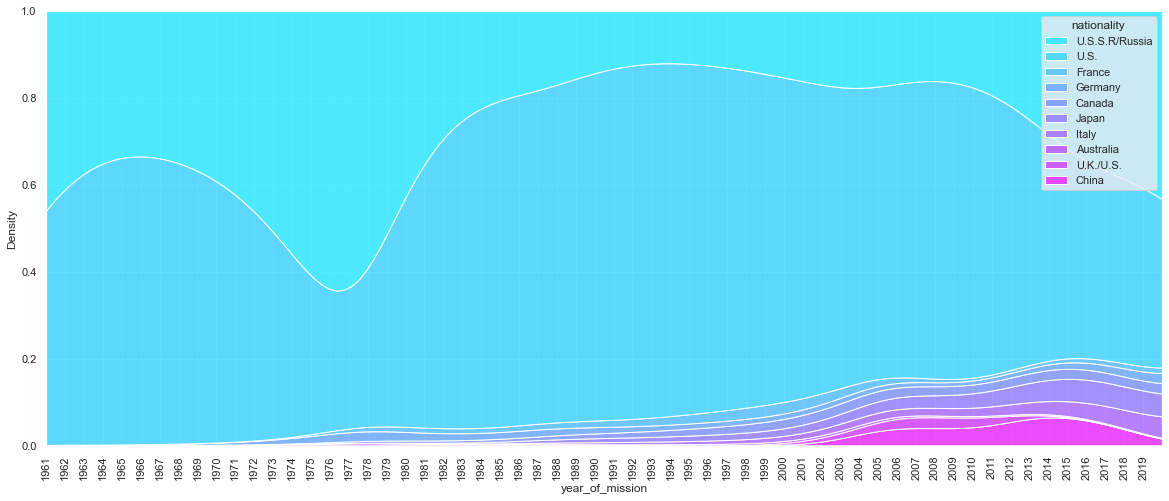

In [109]:
fig, ax1 = plt.subplots(figsize=(20,8))
plt.xticks(rotation=90)
plt.xticks(np.arange(df['year_of_mission'].values.min(),df['year_of_mission'].values.max()+1))
plt.xlim(df['year_of_mission'].values.min(), df['year_of_mission'].values.max()+1)
histNationalityByYear = sns.kdeplot(data=top10NationsDf, x='year_of_mission',ax=ax1, hue='nationality', palette='cool', multiple='fill')

*** How is the cooperation between nations in the space exploration?**

Cluster based on '**mission_title**':

In [111]:
g1 = nx.Graph()
g1 = nx.from_pandas_edgelist(df, source='mission_title', target='nationality')
print(nx.info(g1))

Name: 
Type: Graph
Number of nodes: 402
Number of edges: 521
Average degree:   2.5920


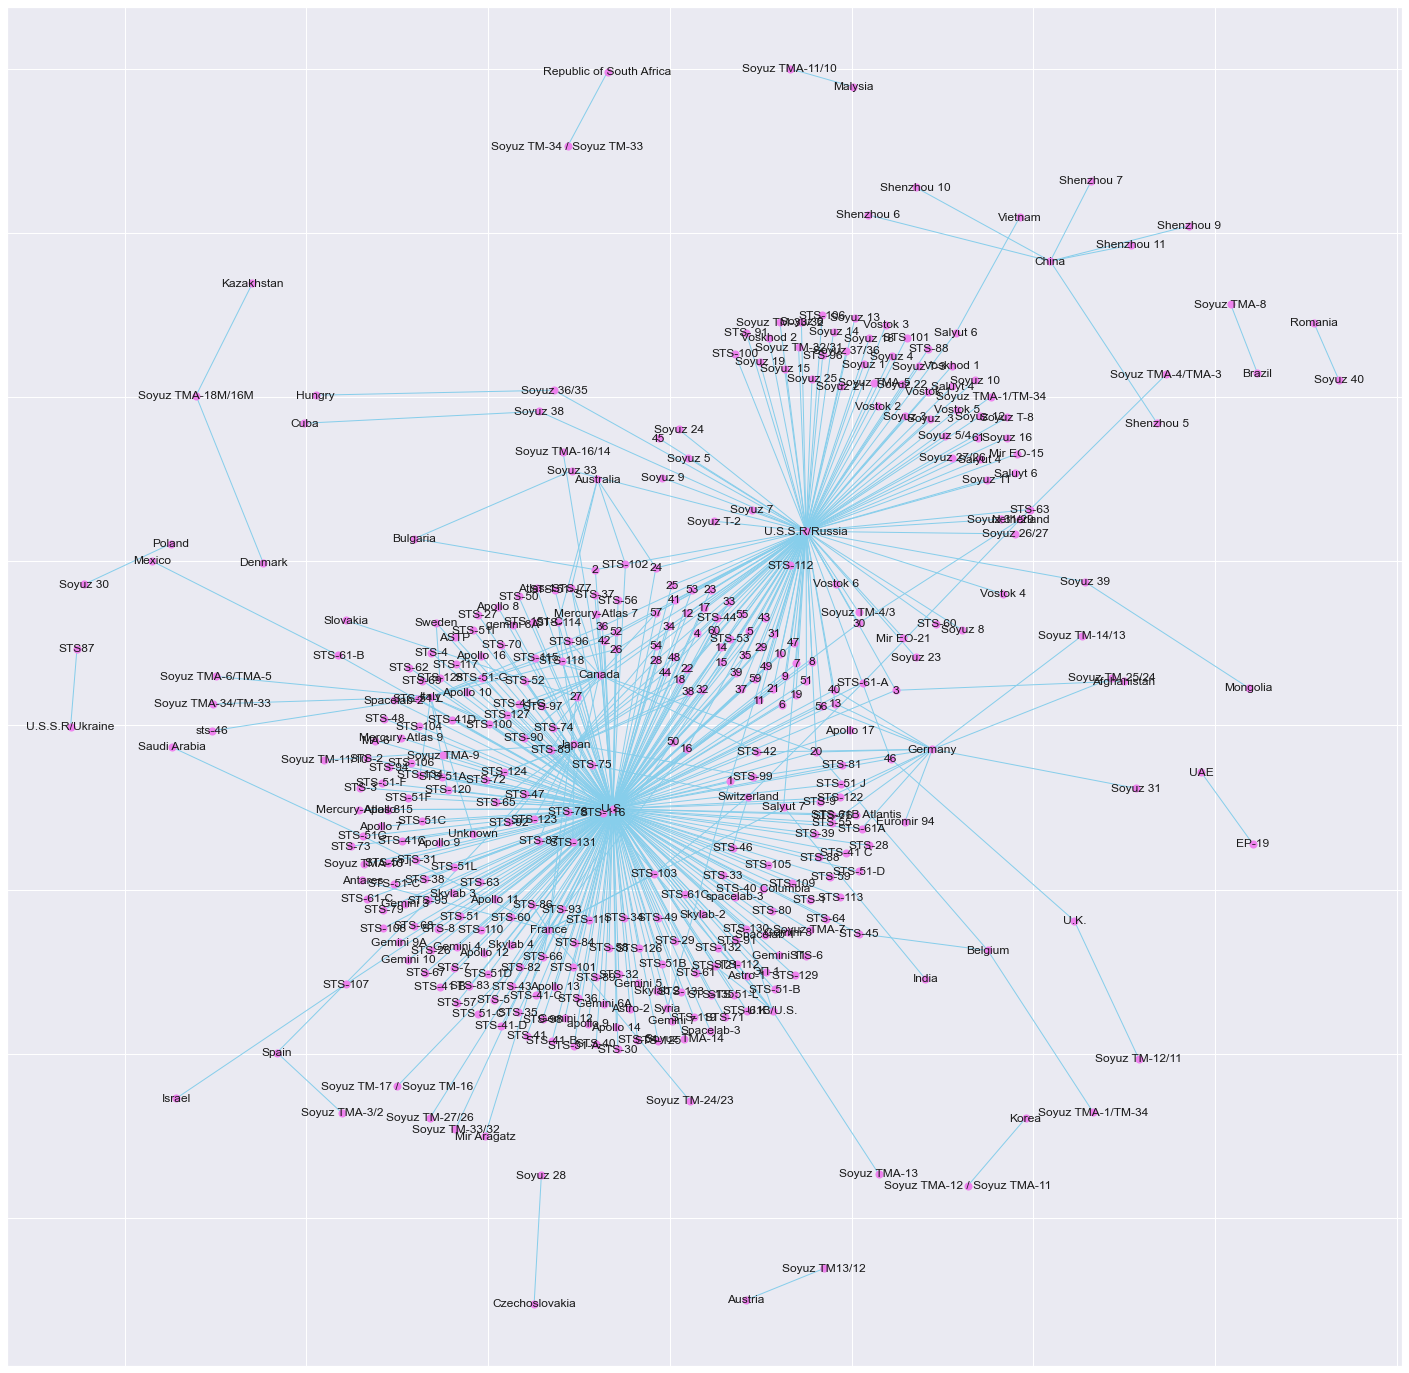

In [112]:
plt.figure(figsize=(25,25))
ps = nx.spring_layout(g1, k=0.17)
nx.draw_networkx(g1, ps, node_size=50, node_color='violet', edge_color='skyblue')
plt.show()

Cluster based on 'in_orbit':

In [113]:
g2 = nx.Graph()
g2 = nx.from_pandas_edgelist(df, source='in_orbit', target='nationality')
print(nx.info(g2))

Name: 
Type: Graph
Number of nodes: 329
Number of edges: 376
Average degree:   2.2857


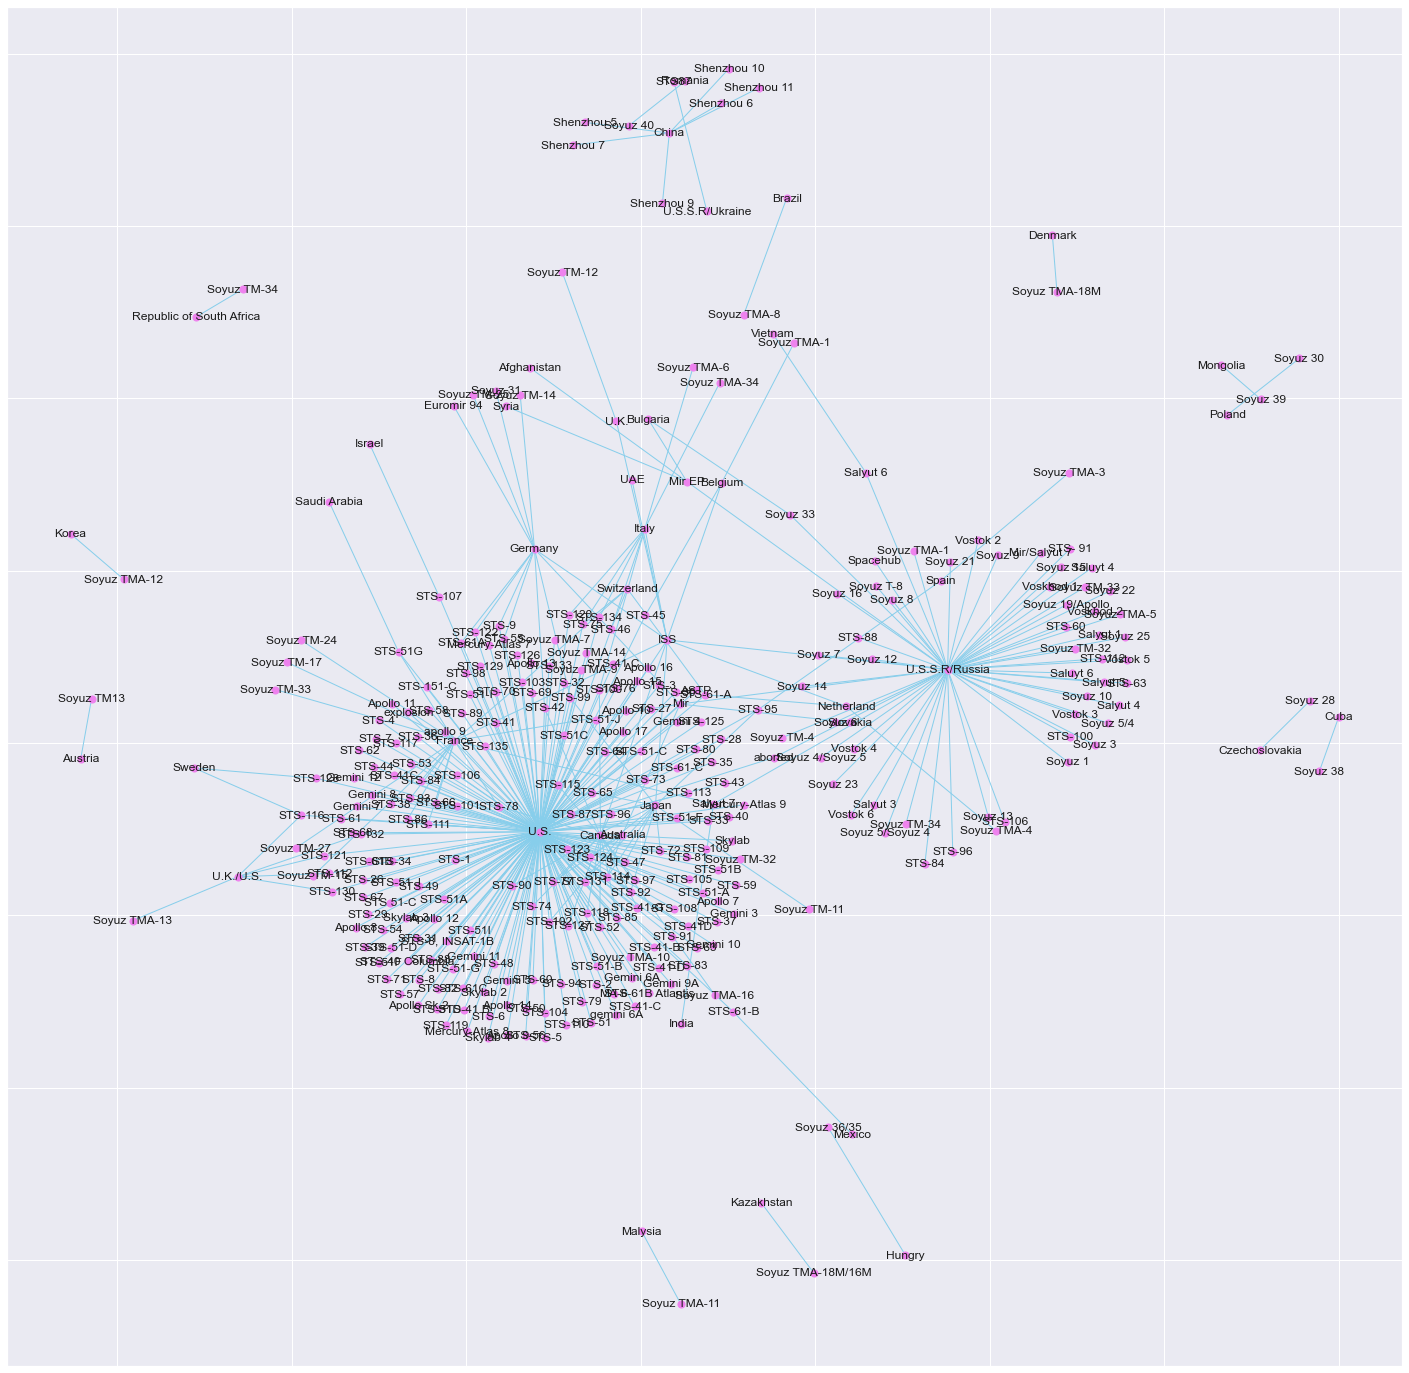

In [114]:
plt.figure(figsize=(25,25))
ps = nx.spring_layout(g2, k=0.17)
nx.draw_networkx(g2, ps,  node_color='violet', edge_color='skyblue', node_size=50)
plt.show()

From the plot above, we can see that there are mainly two big clusters of nations based on the coorperation of the space exploration: U.S. and U.S.S.R/Russia. They have their own space missions and spacecrafts in_orbit and they also coorperate with each other on some missions.  
The most other nations coorperate with the U.S. or U.S.S.R/Russia or with both on different missions. China has its own space mission projects and spacecrafts in orbit. 

## 5. Conclusion<a name='conclusion'></a>

From the data analysis above, we can conclude the following points:  
* The average single duration of a mission varies from mission to mission and it's getting longer and longer.  
* The average age of the astronauts on mission is getting older and the more subtasks in one mission, the older the average age of astronauts on misssion. And the average age of astronauts on mission depends also on the mission, it varies from mission to mission.  
* Training time (time from selected to first mission) is getting shorter and shorter. It's interesting to see that the younger the astronaut at the selection, the more time he/she takes till his/her first mission. 
* The proportion of female missions has increased since the end of 1970s, but it stayed almost same till now. Similarly, the proportion of civilian missions has also increased since the end of 1970s and stayed almost unchanged till now.  
* The proportion of different occupations has changed over the time. (Note: in 2021 many more space participants went to the space!)  
* The U.S. and Ruassia(incl. U.S.S.R) are always the top 2 nations with the most space missions over all the time. More and more nations have begun their space exploration, most of them have a tight coorperation with the U.S or/and Russia(incl. U.S.S.R), and from the cluster analysis we can see that China has it's own space mission and spacecraft in orbit.  